In [ ]:
!nvidia-smi

Sat Nov 22 14:20:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install roboflow==1.1.48 --quiet
!pip install ultralytics==8.2.103 -q

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.4/112.6 GB disk)


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("orpf").project("sign-detection-rqmfy")
version = project.version(12)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sign-Detection-12 in yolov8:: 100%|██████████| 1830/1830 [00:00<00:00, 2250.06it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Sign-Detection-12/data.yaml epochs=50 imgsz=640 plots=True \
fliplr=0.0 flipud=0.0 hsv_h=0.0 hsv_s=0.0 hsv_v=0.0 degrees=0.0 translate=0.0 scale=0.0 shear=0.0 perspective=0.0 mosaic=0.0 mixup=0.0

100% 49.7M/49.7M [00:00<00:00, 114MB/s]
New https://pypi.org/project/ultralytics/8.3.230 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Sign-Detection-12/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.7 source=/content/Sign-Detection-12/test/images

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs

image 1/33 /content/Sign-Detection-12/test/images/160_jpg.rf.45757fe2927ac0454324a3f4e85006b3.jpg: 640x640 1 No Entry, 37.0ms
image 2/33 /content/Sign-Detection-12/test/images/16_jpg.rf.fc0bfd9f785de0efcebf787f1908e391.jpg: 640x640 1 Speed Limit 40, 37.1ms
image 3/33 /content/Sign-Detection-12/test/images/18_jpg.rf.7d0a100672908f01cc81546f1f5bd579.jpg: 640x640 1 Speed Limit 30, 37.0ms
image 4/33 /content/Sign-Detection-12/test/images/20_jpg.rf.5cd8870f703563696493bdd394fba38f.jpg: 640x640 1 Speed Limit 60, 35.6ms
image 5/33 /content/Sign-Detection-12/test/images/22_jpg.rf.533f57dcbded7d2fcee35ac344a76e66.jpg: 640x640 1 Curve Right, 29.9ms
image 6/33 /content/Sign-Detection-12/test/images/25_jpg.rf.47dbe5d6154025dc920225ab3e87a1f2.jpg: 640x640 1 Speed Limit 30, 29.9ms
image 7/33 /content/Sign-Detection-12/test/images/

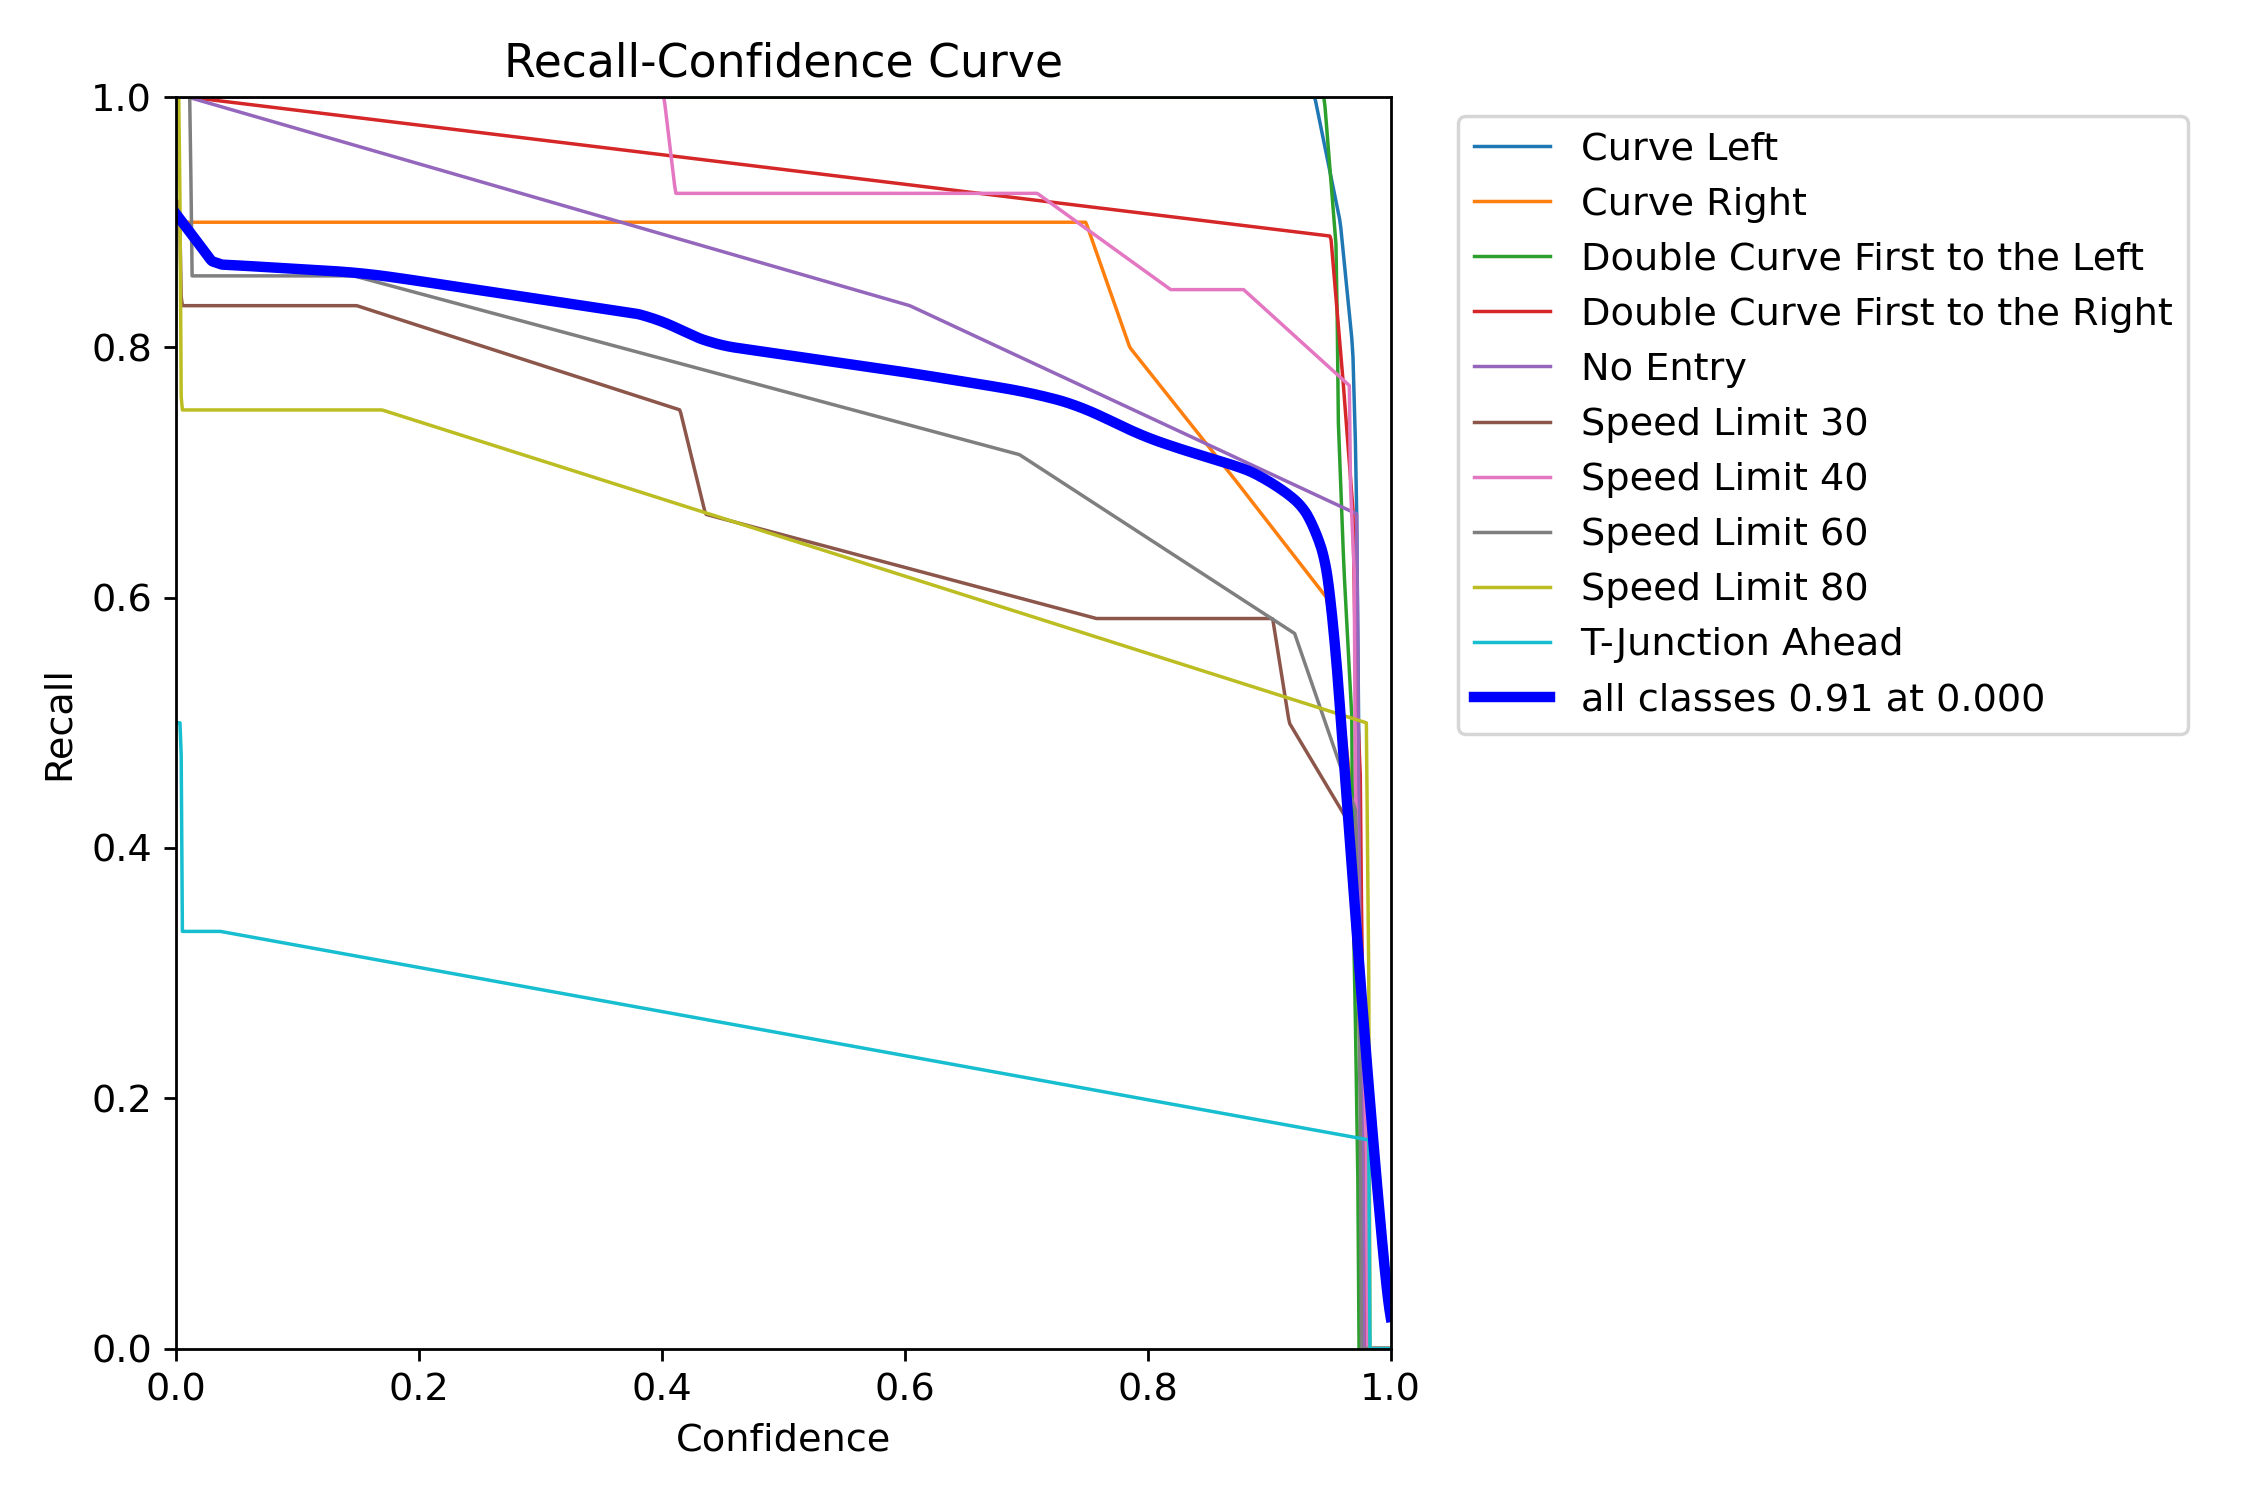

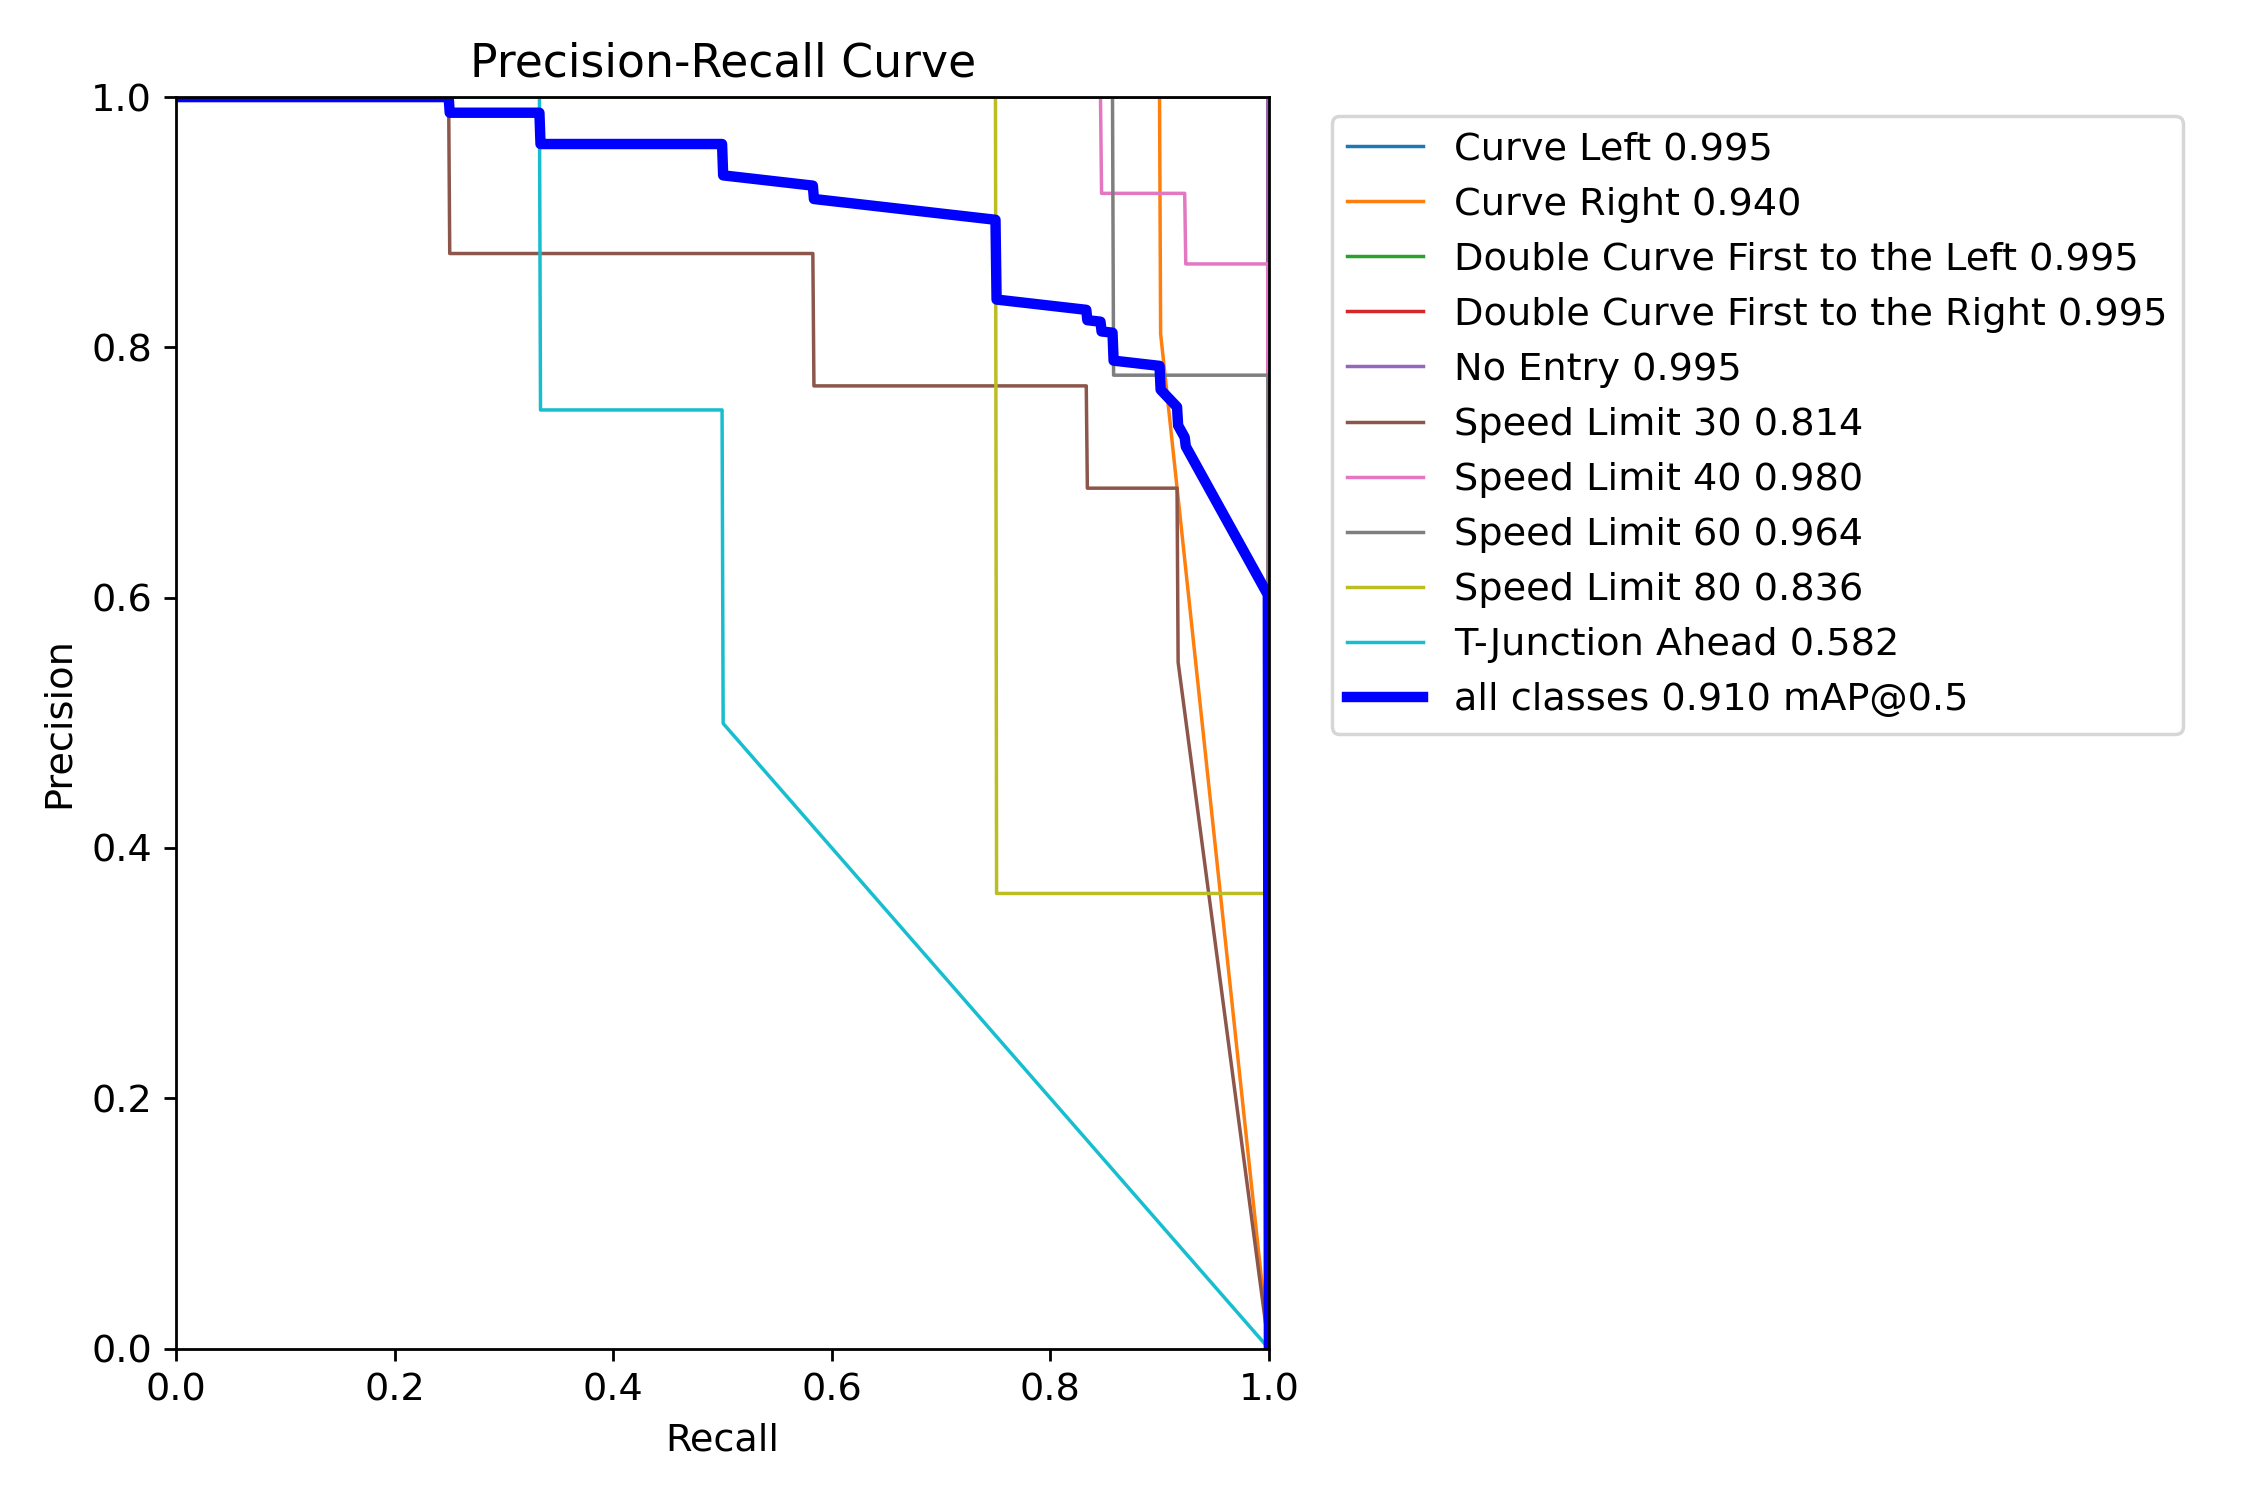

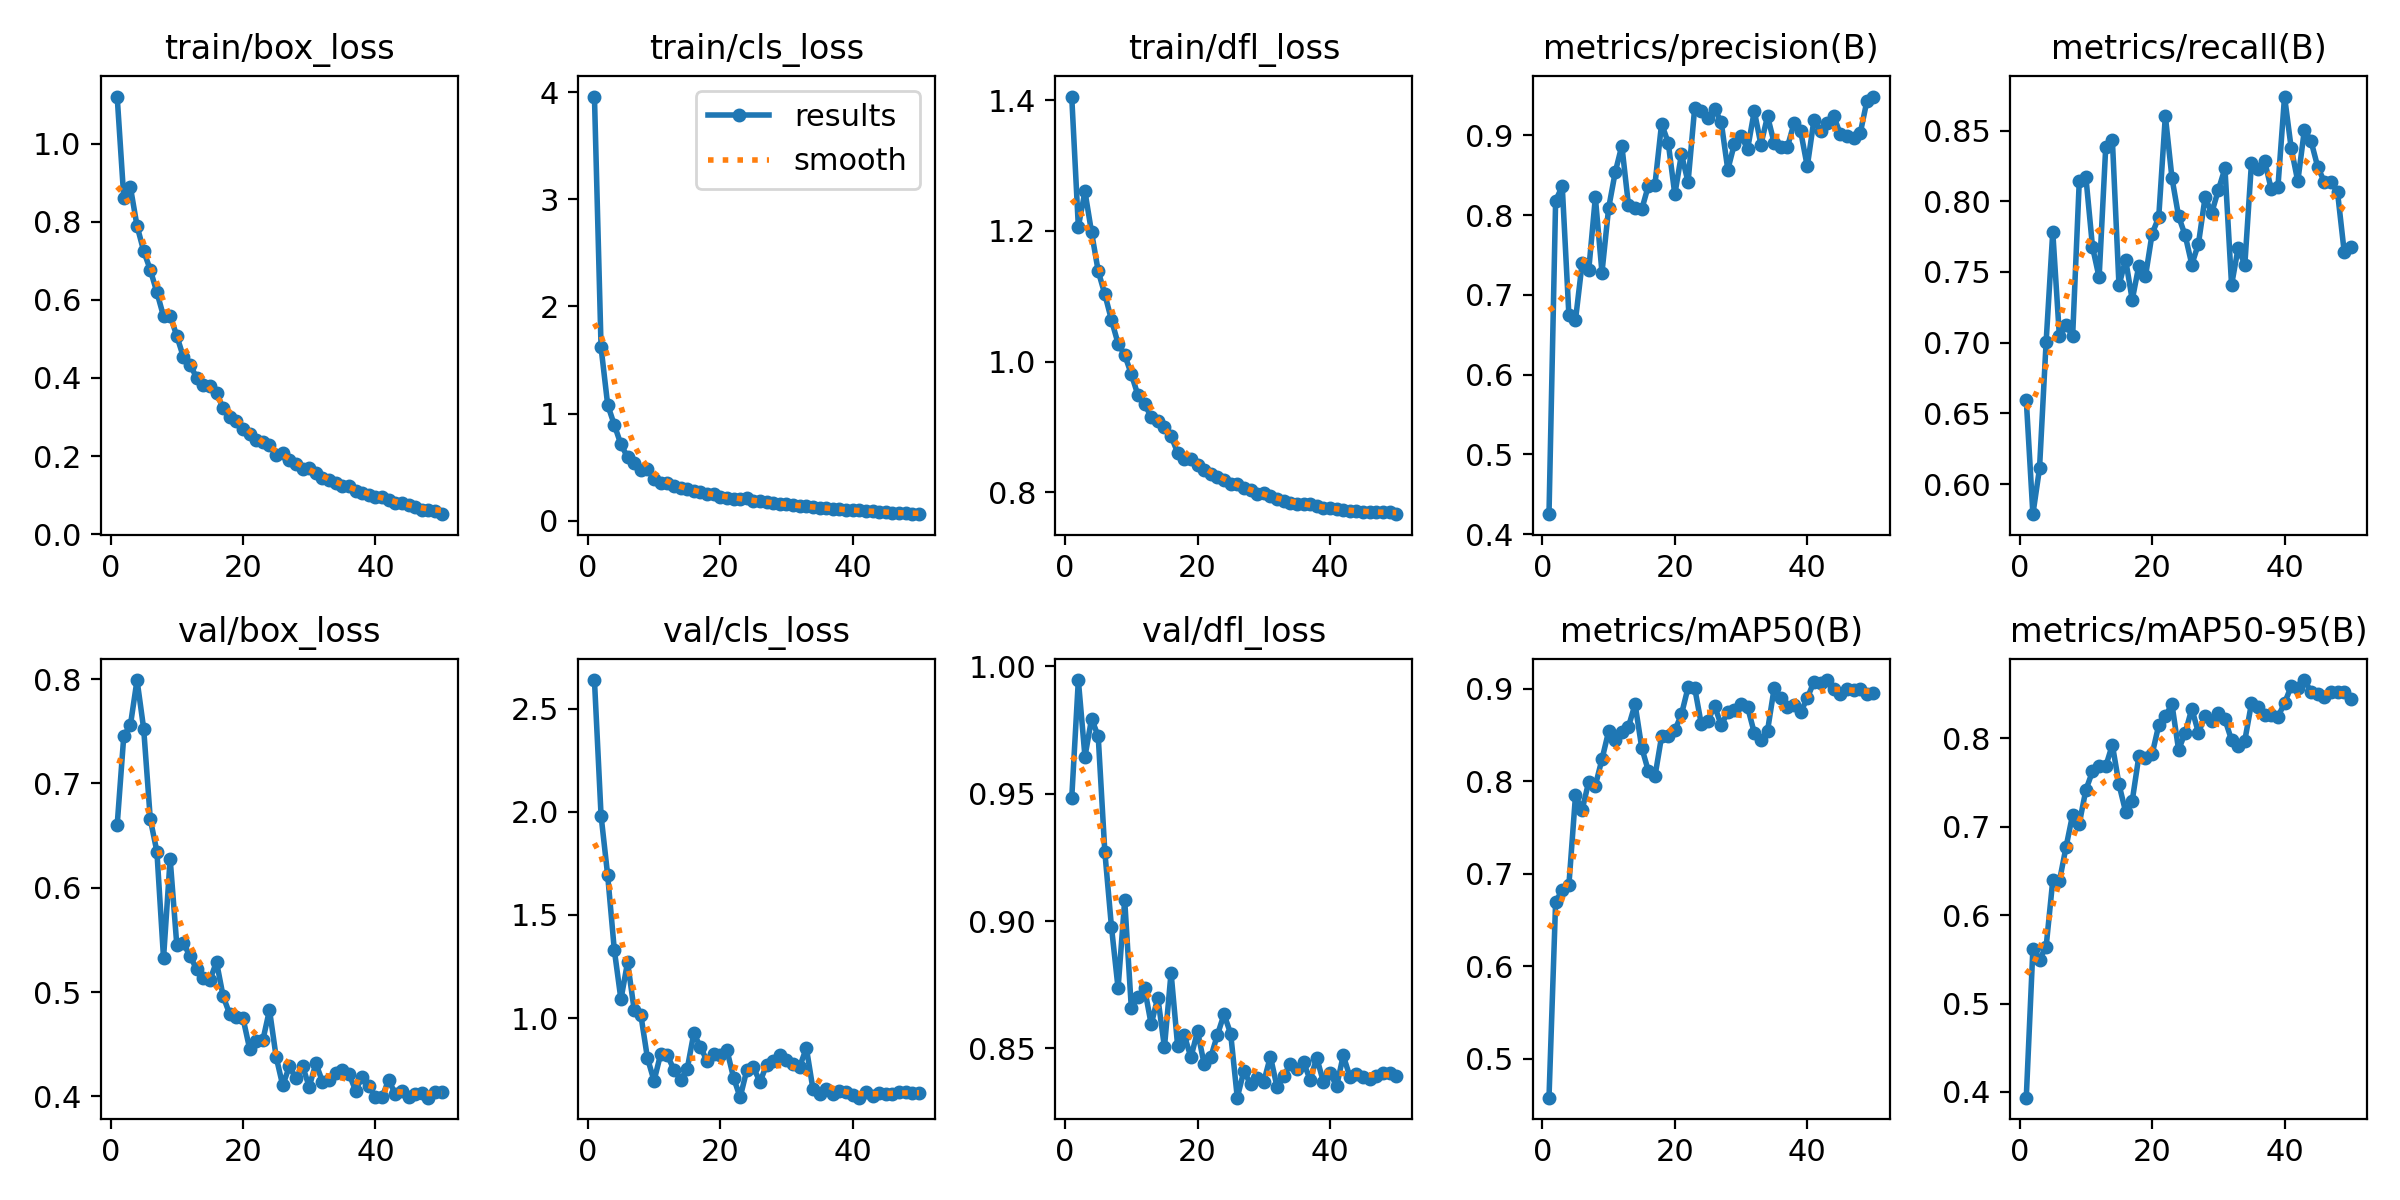

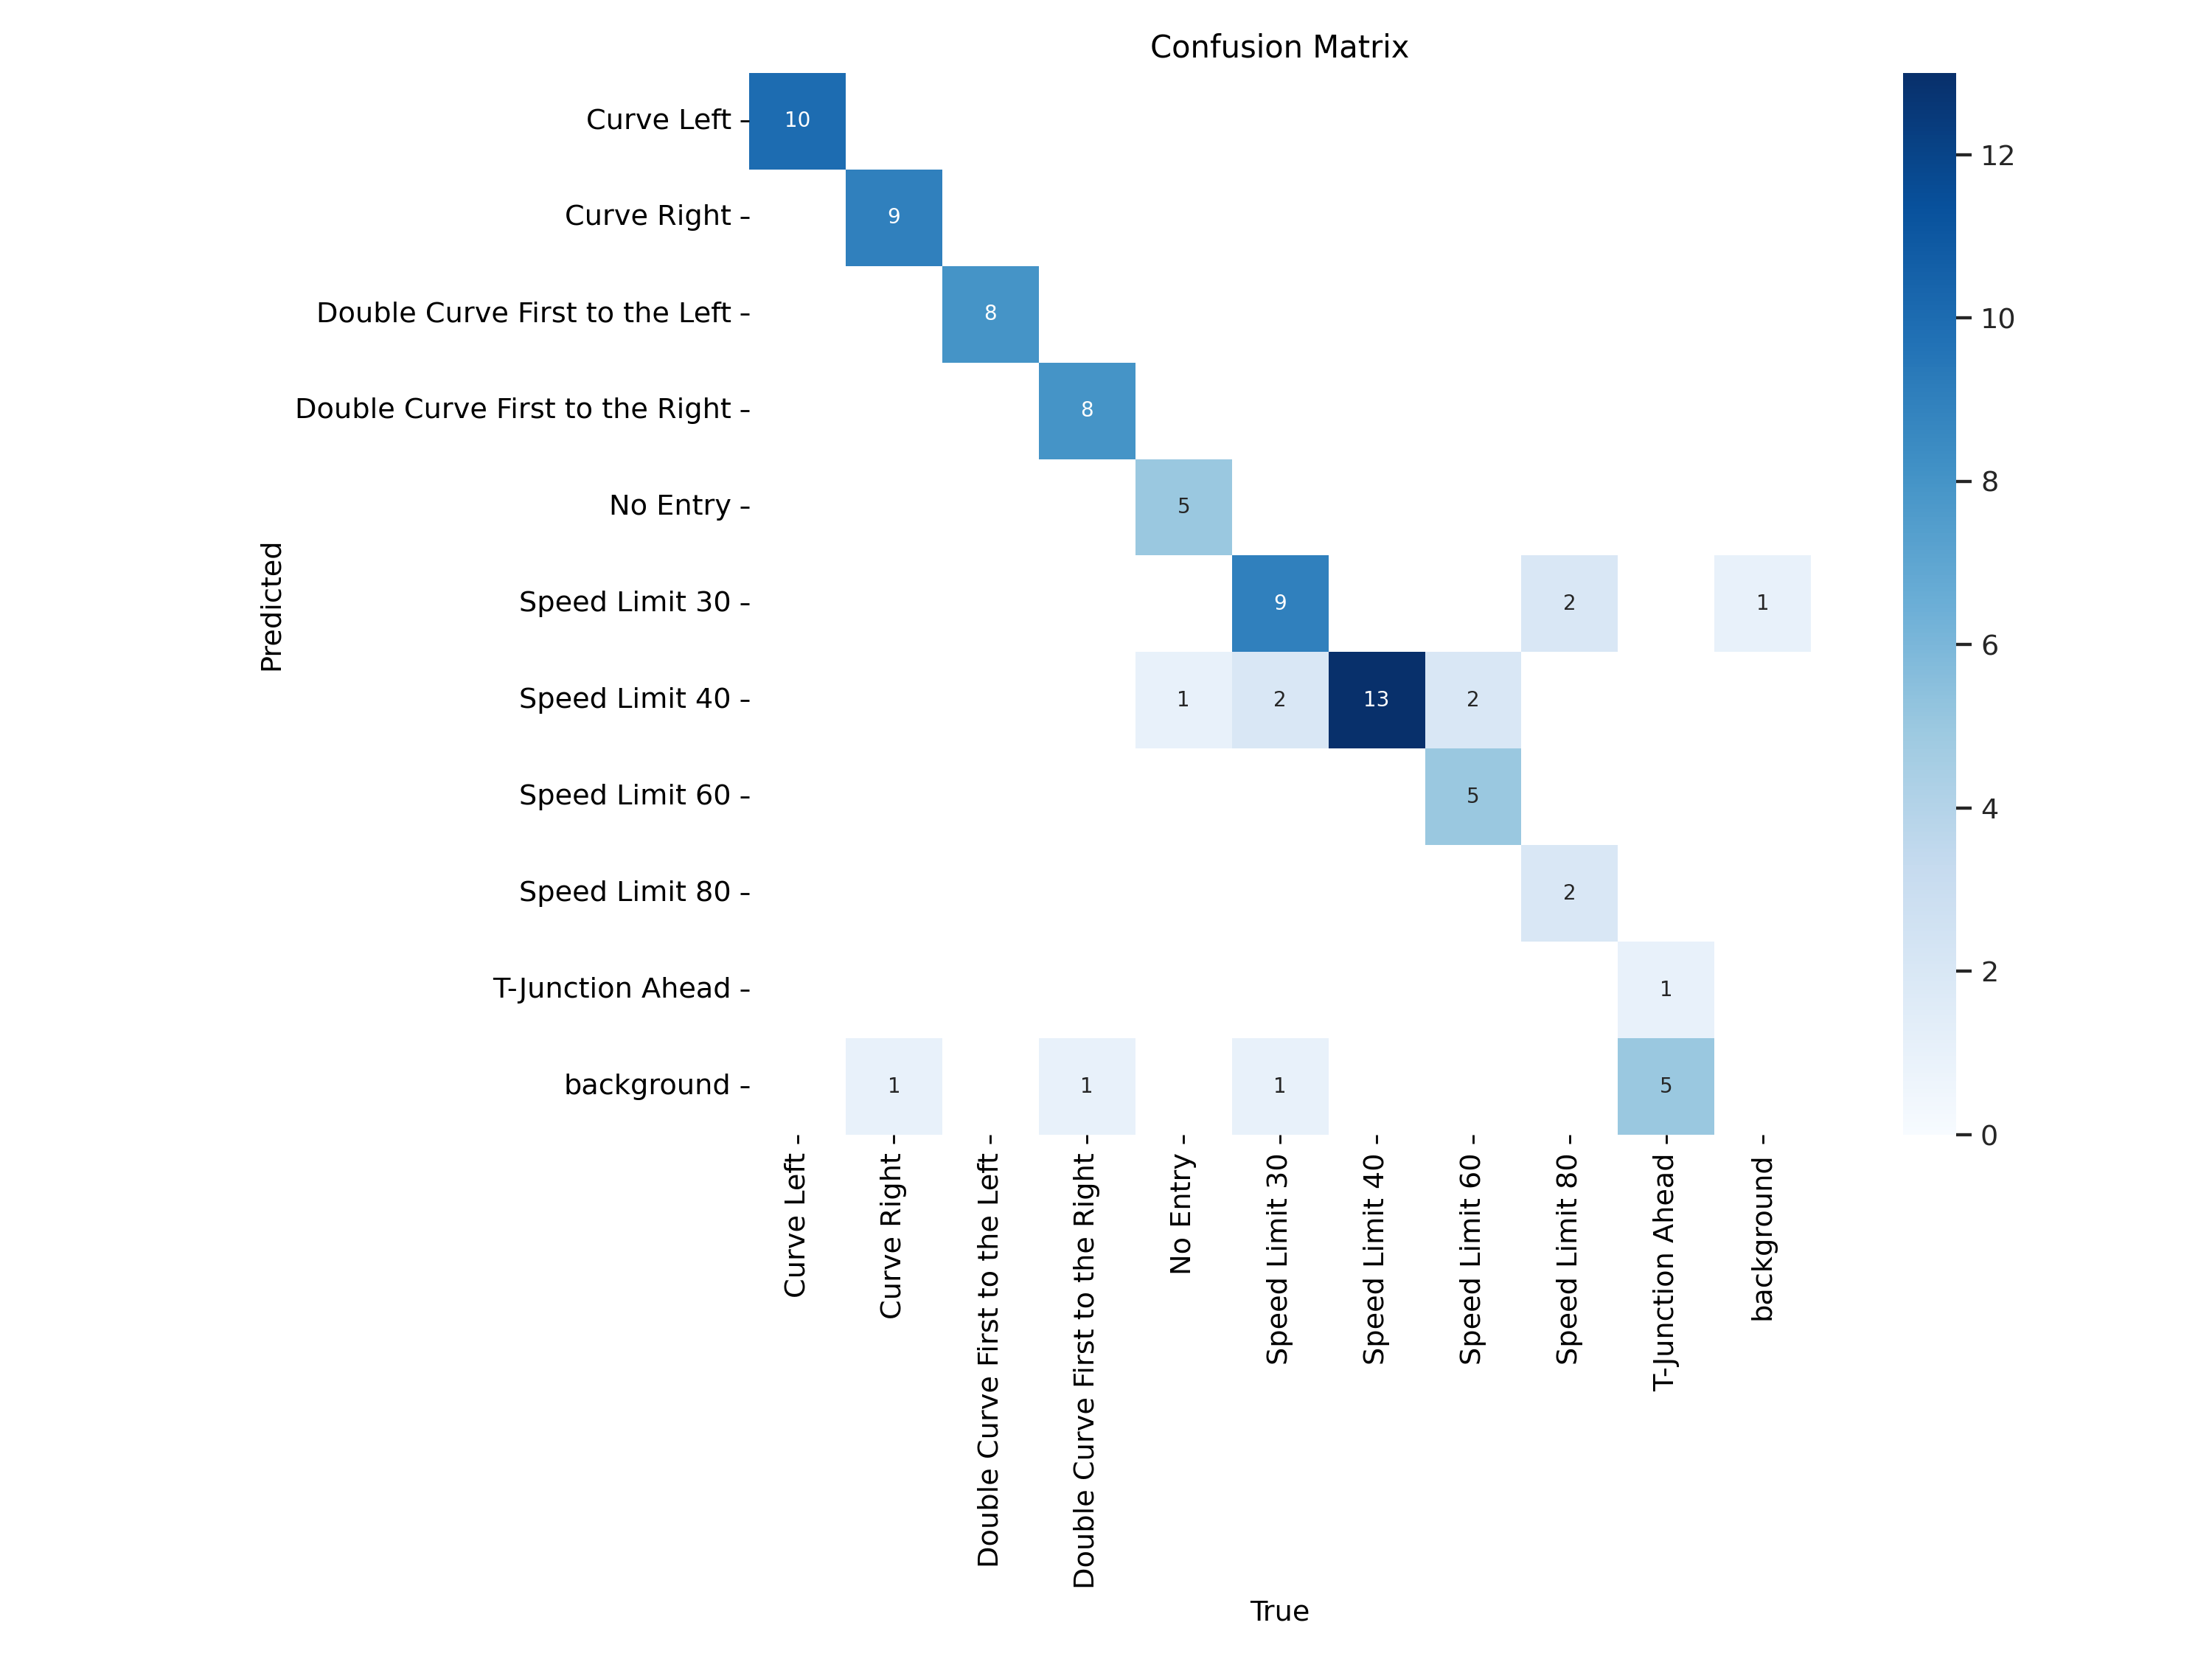

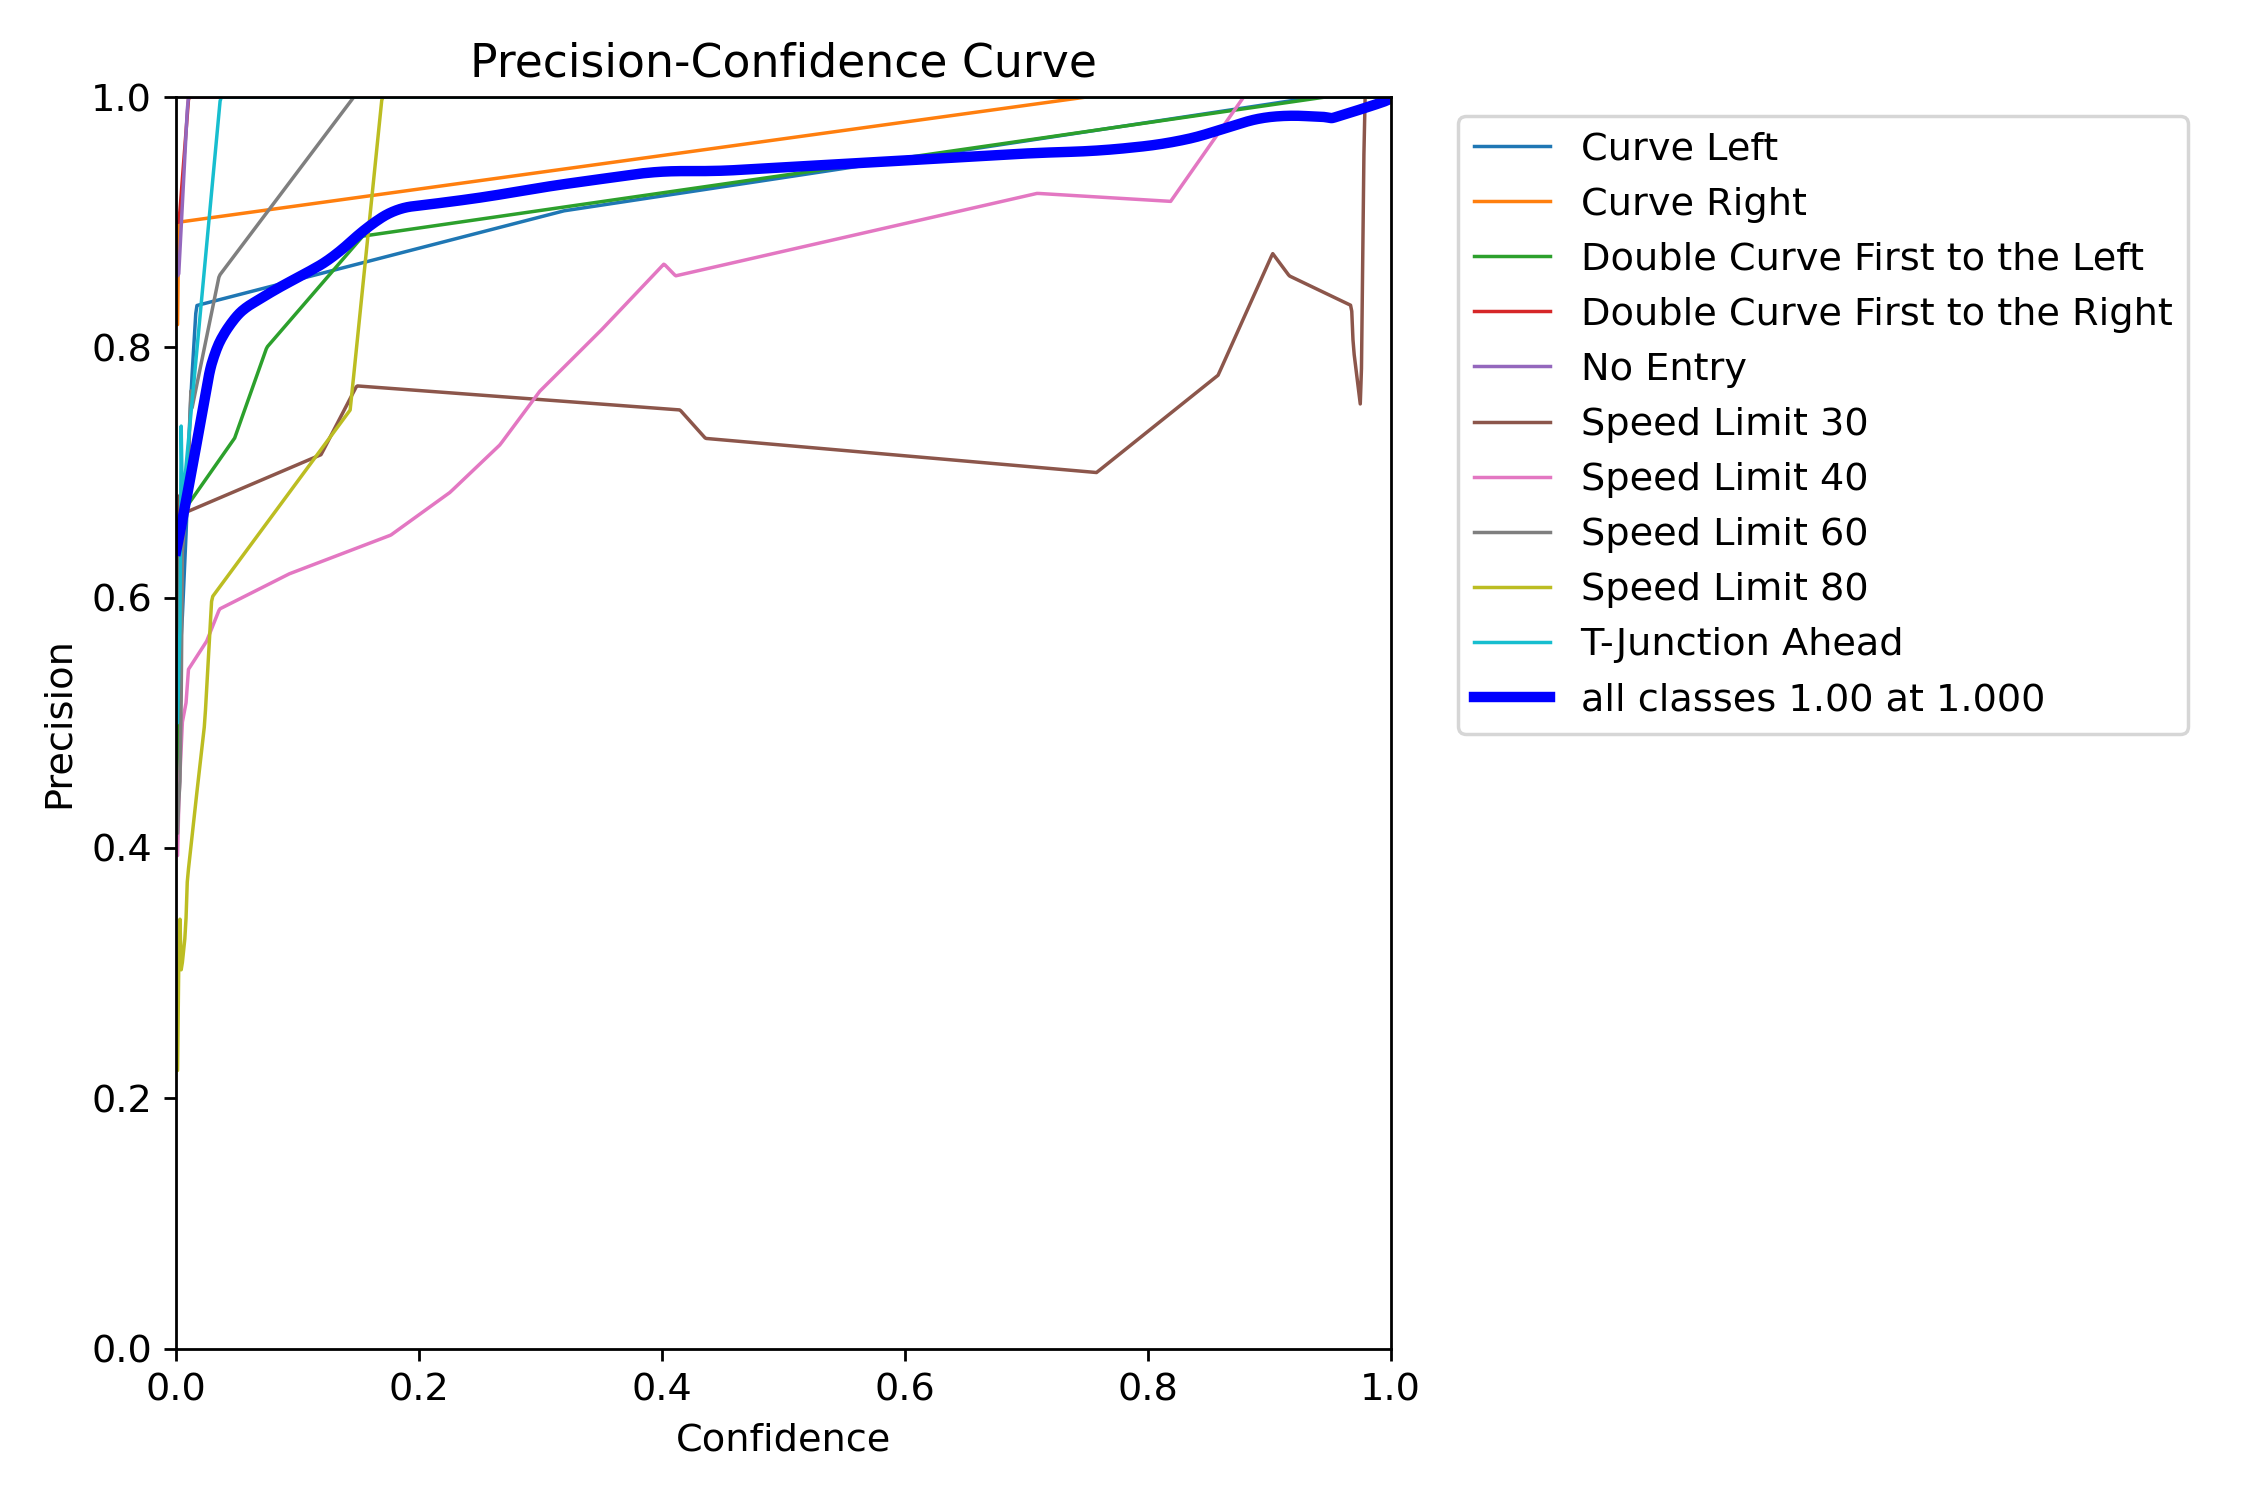

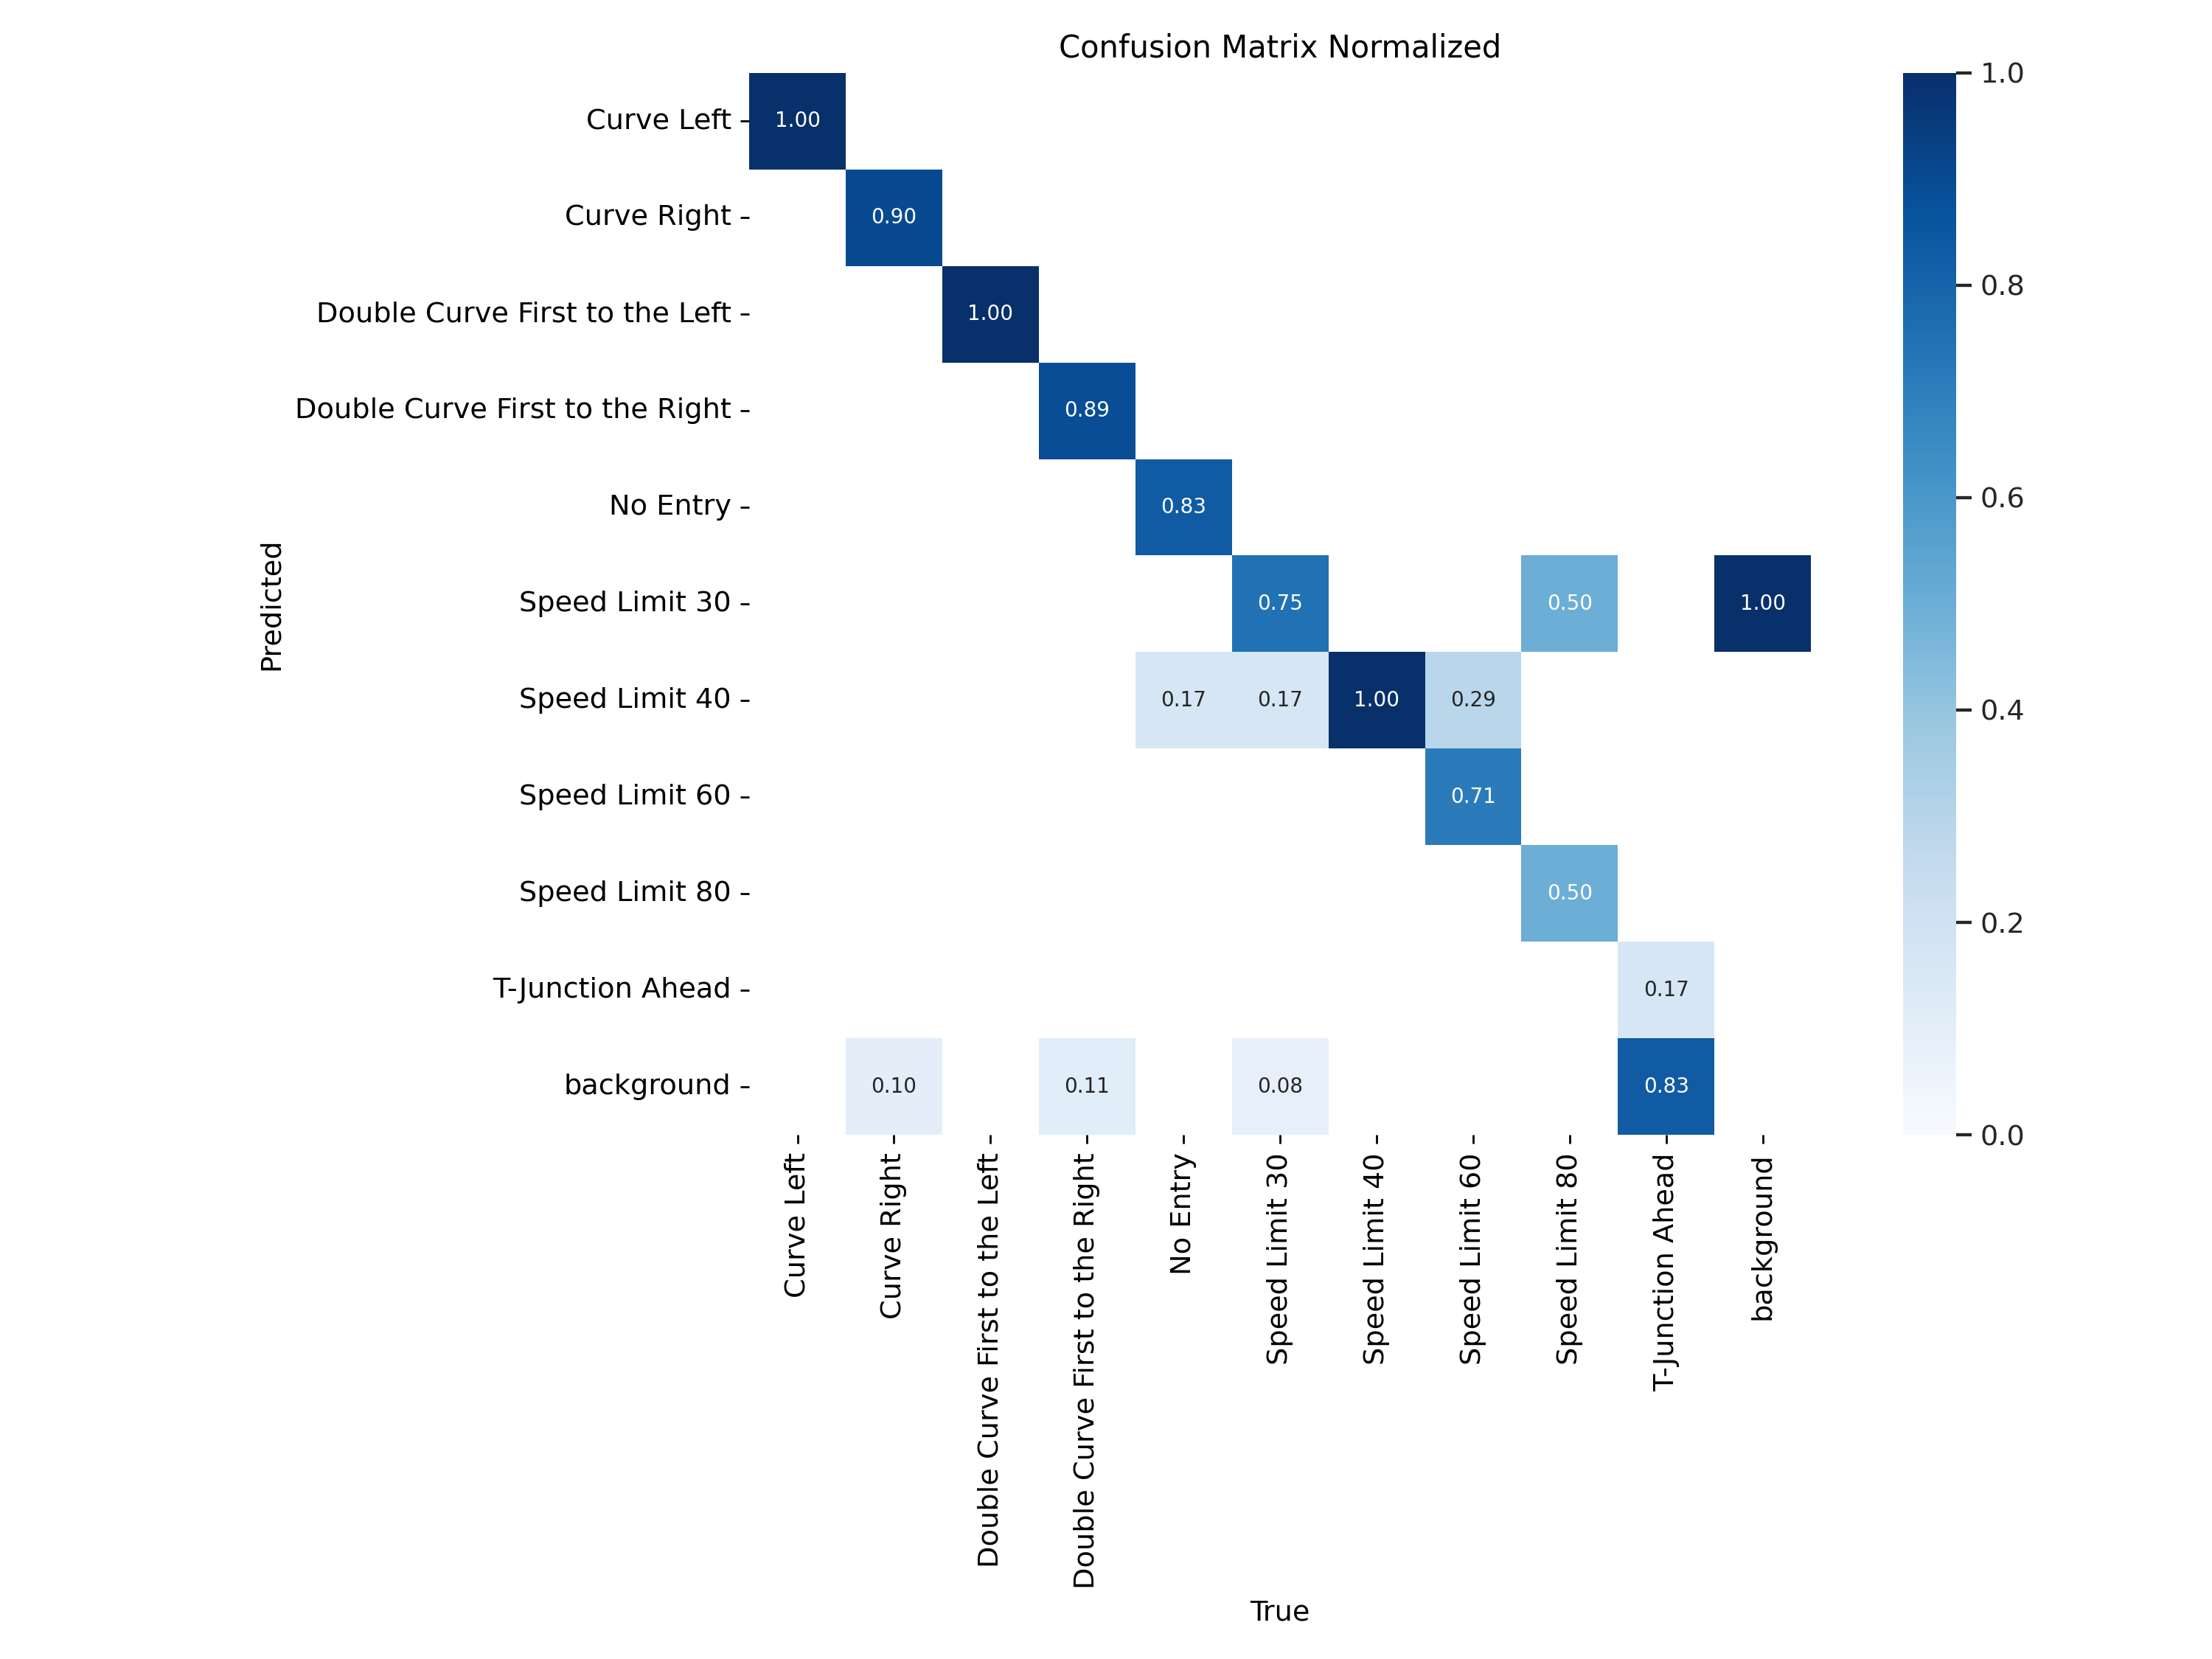

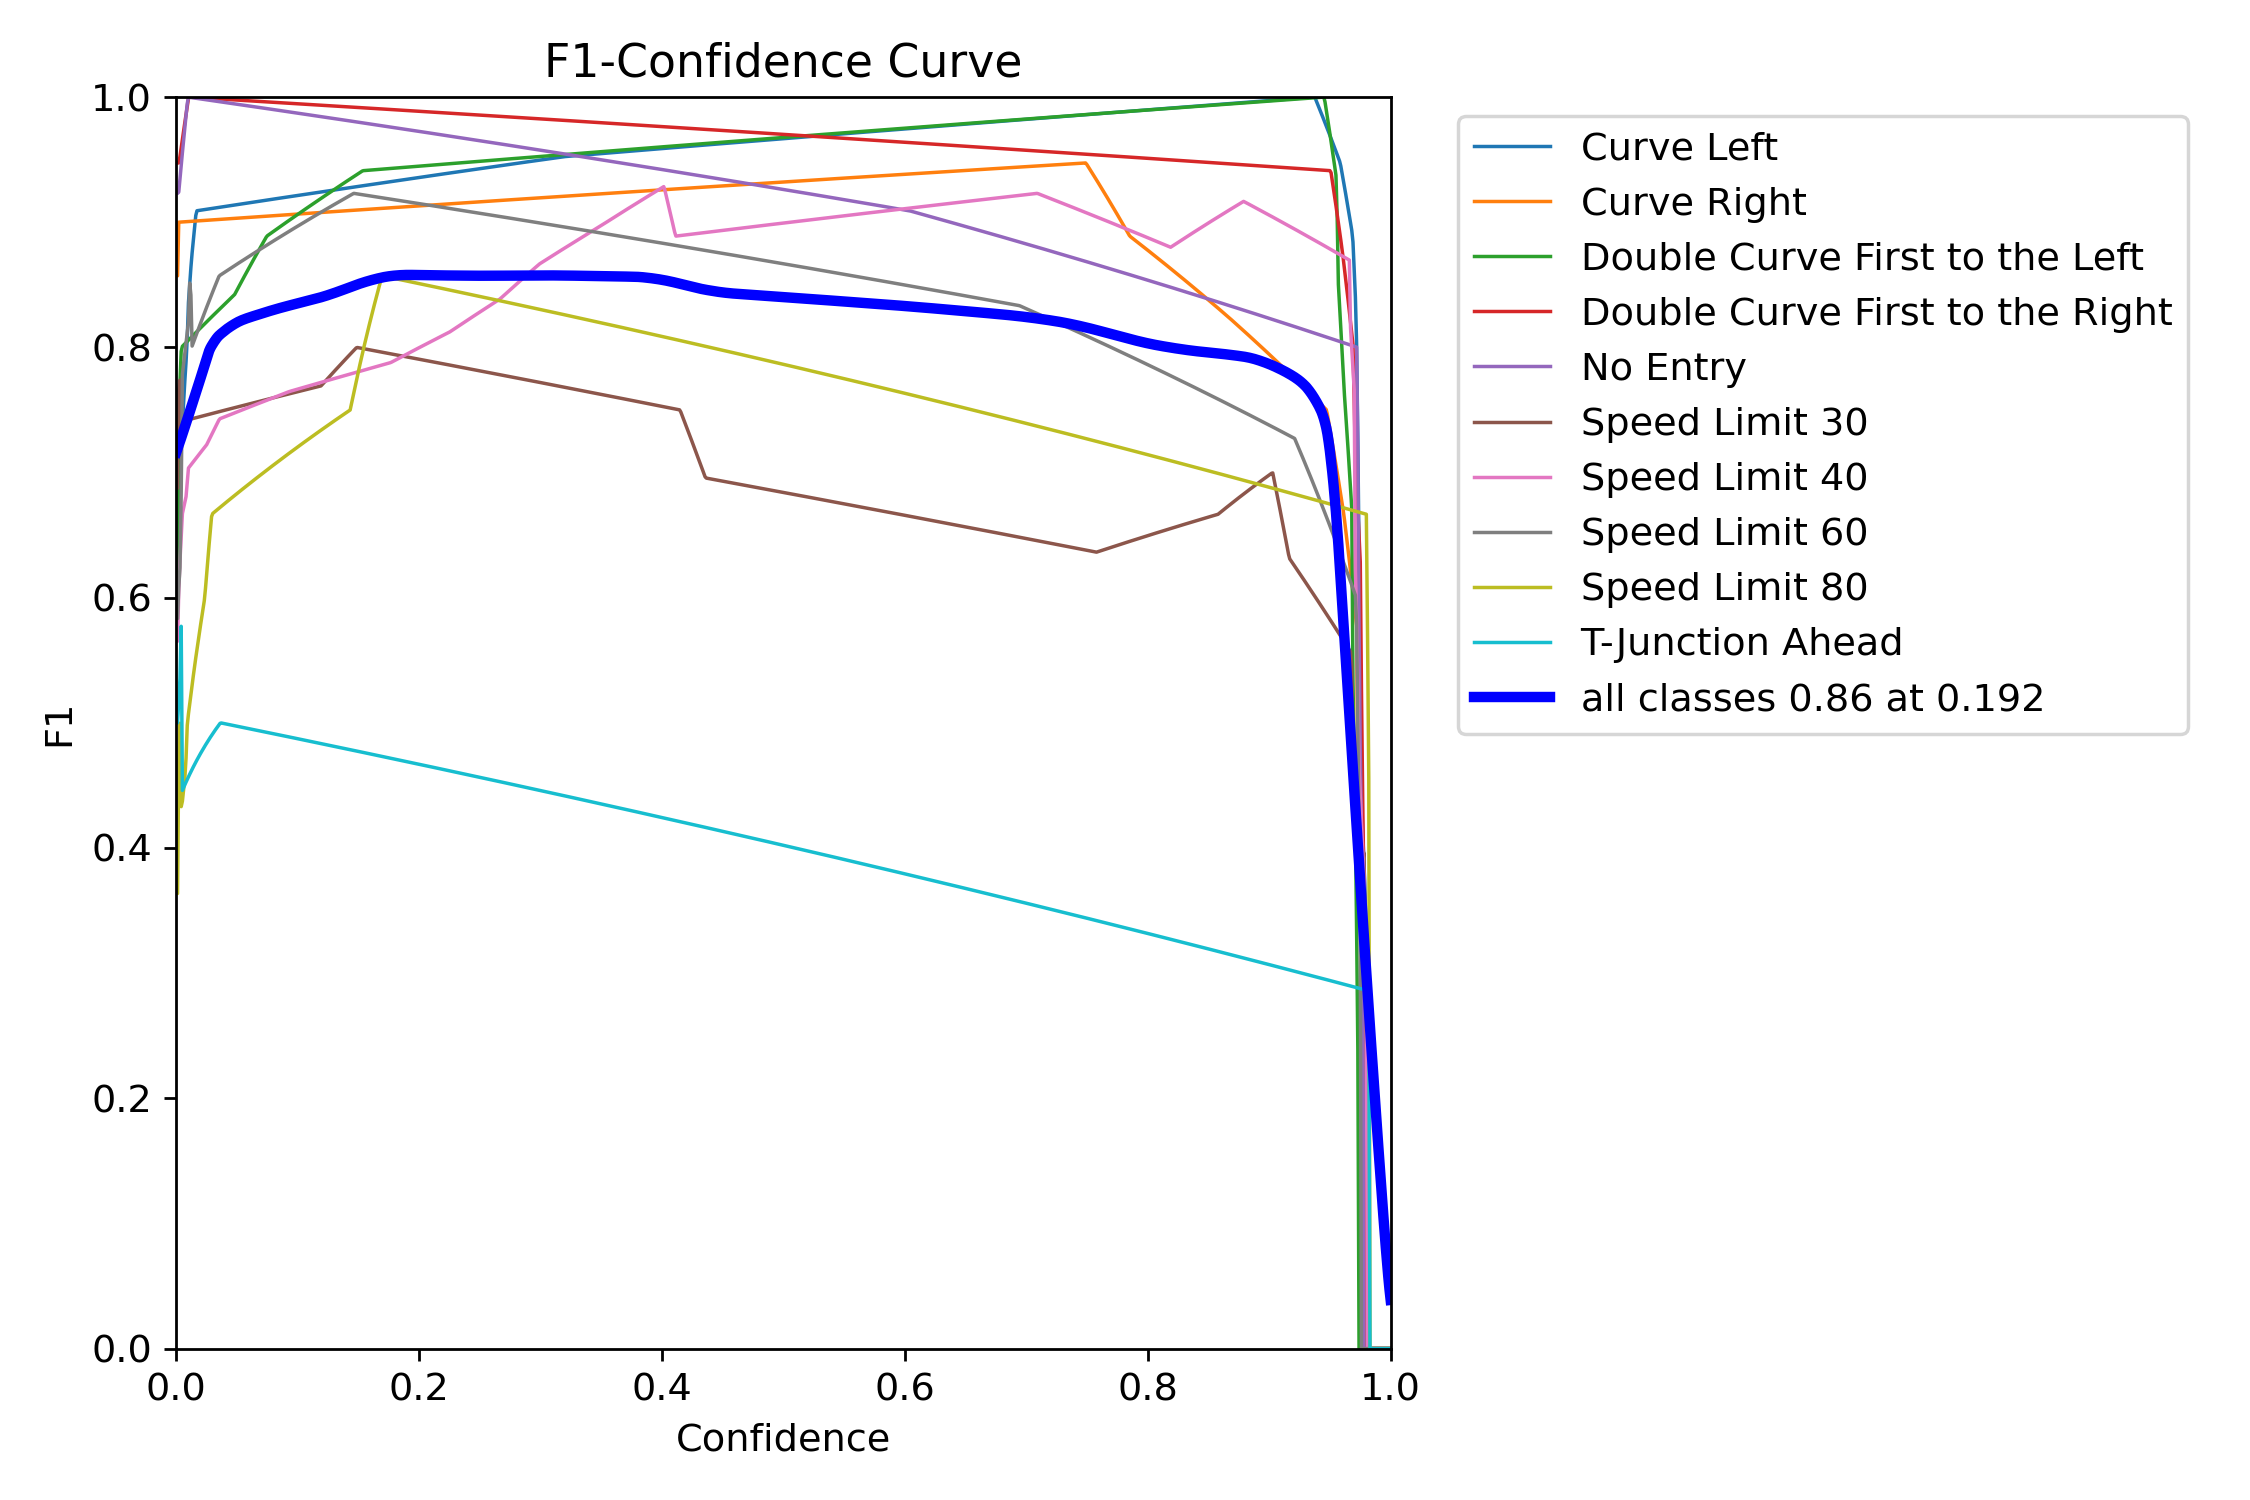

In [ ]:
import glob
from IPython.display import Image, display

image_files = glob.glob('/content/runs/detect/train/*.png')

for img_path in image_files:
    display(Image(filename=img_path))

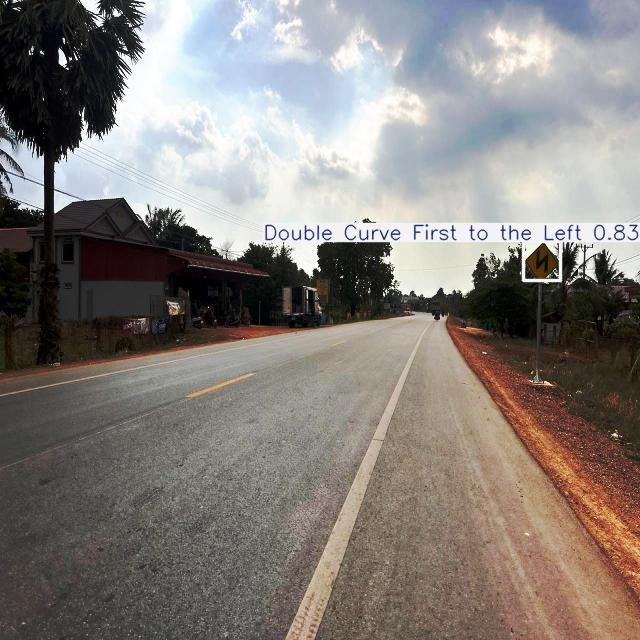

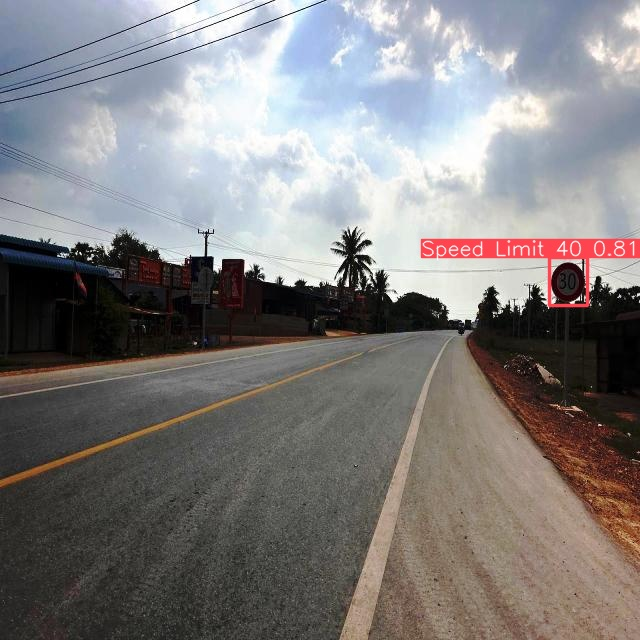

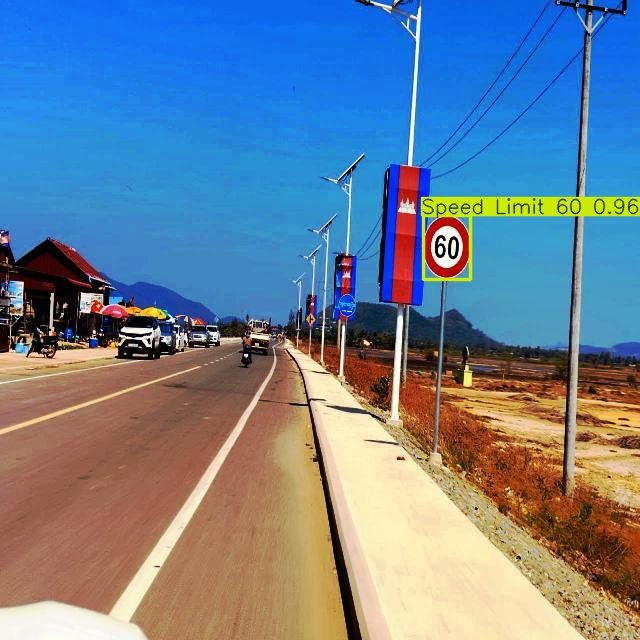

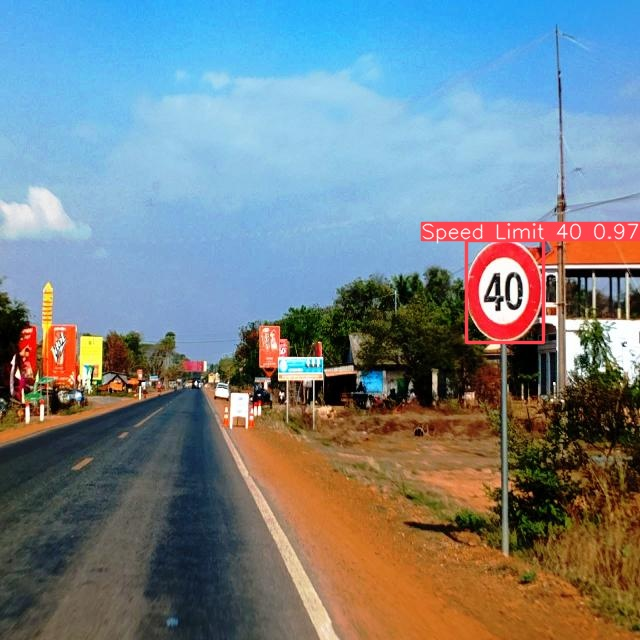

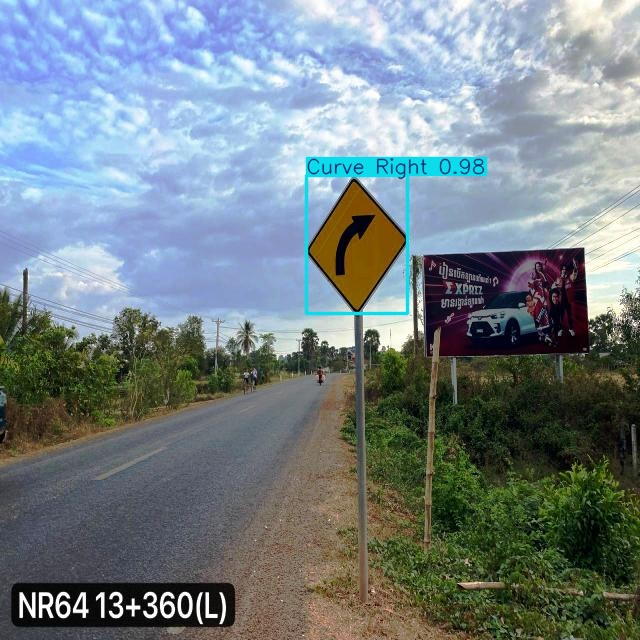

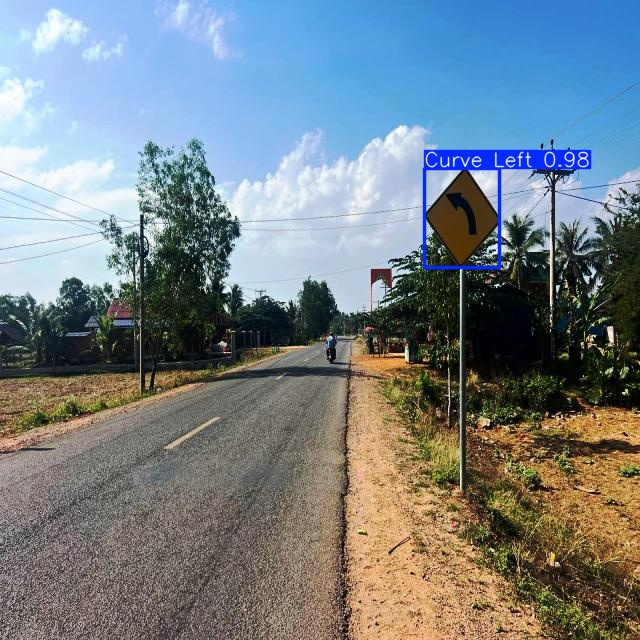

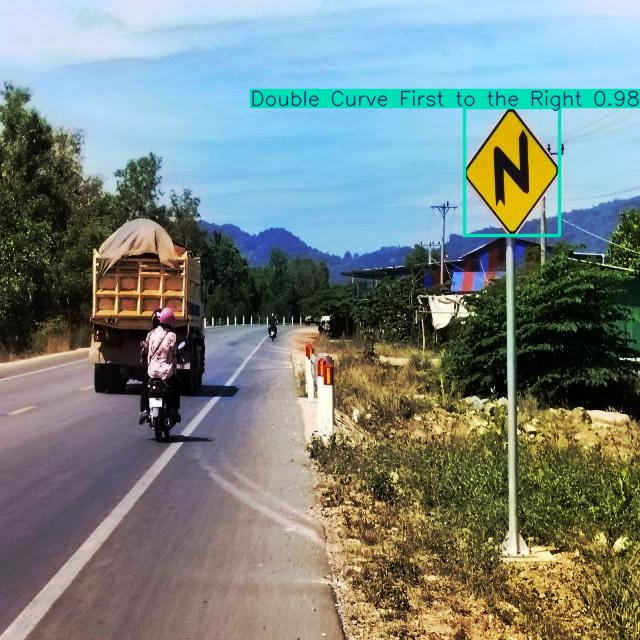

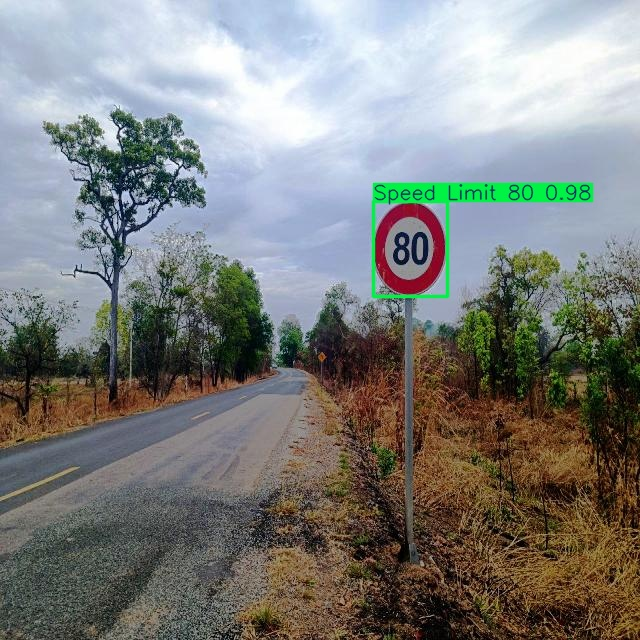

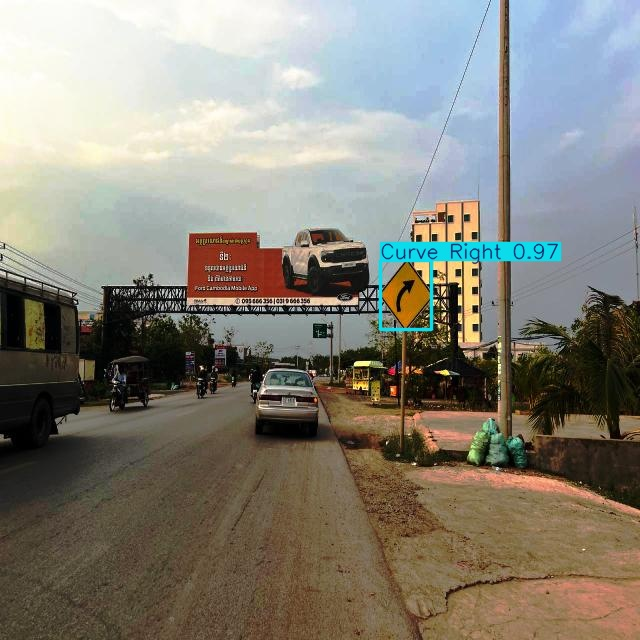

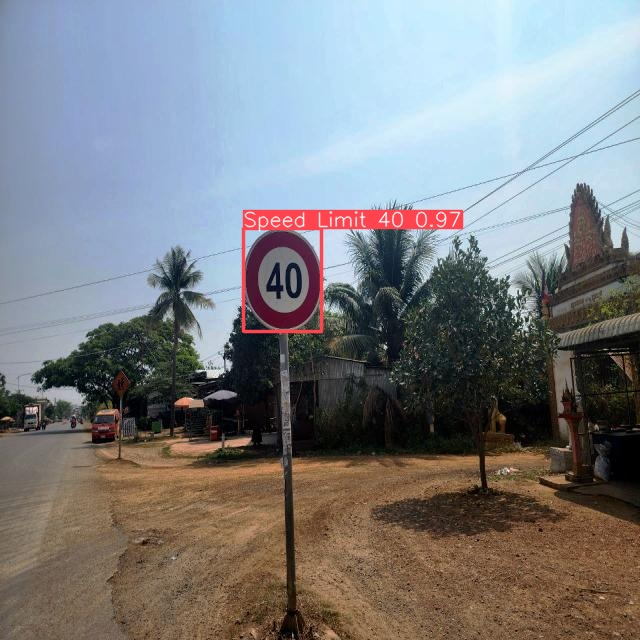

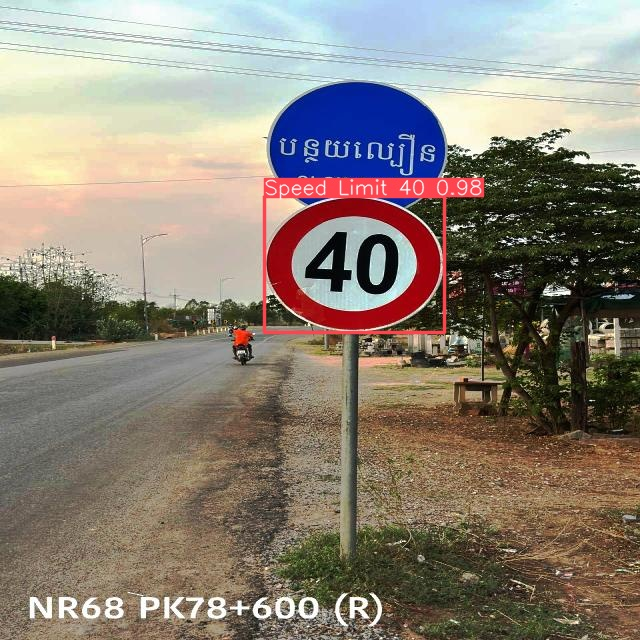

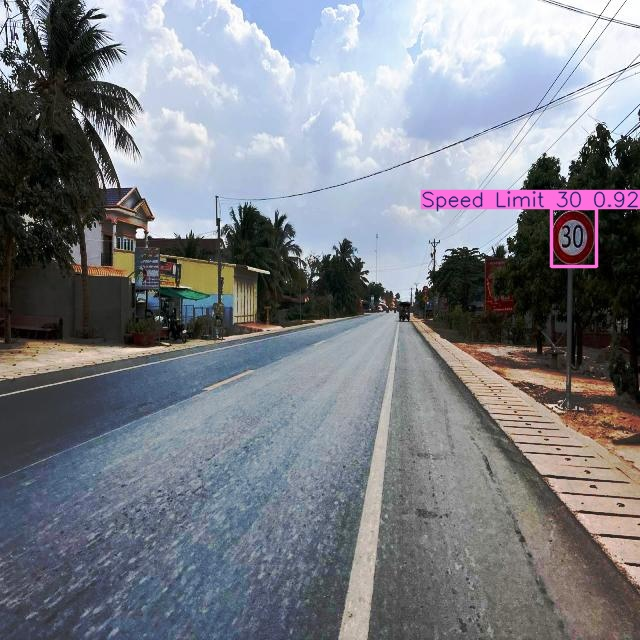

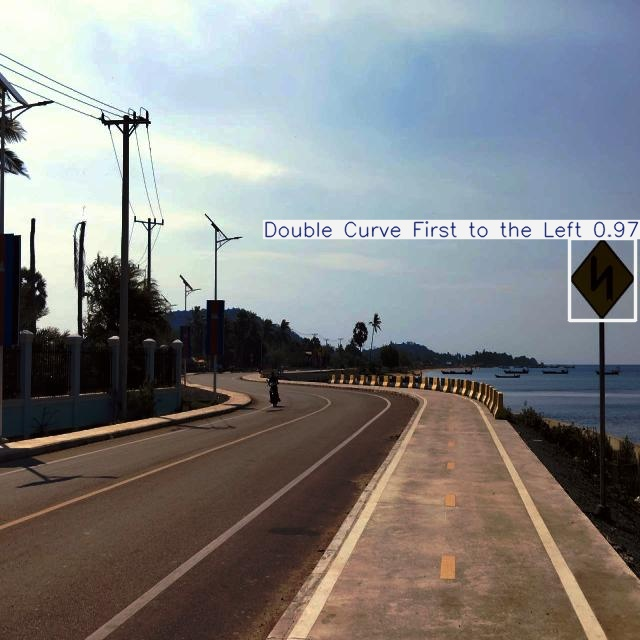

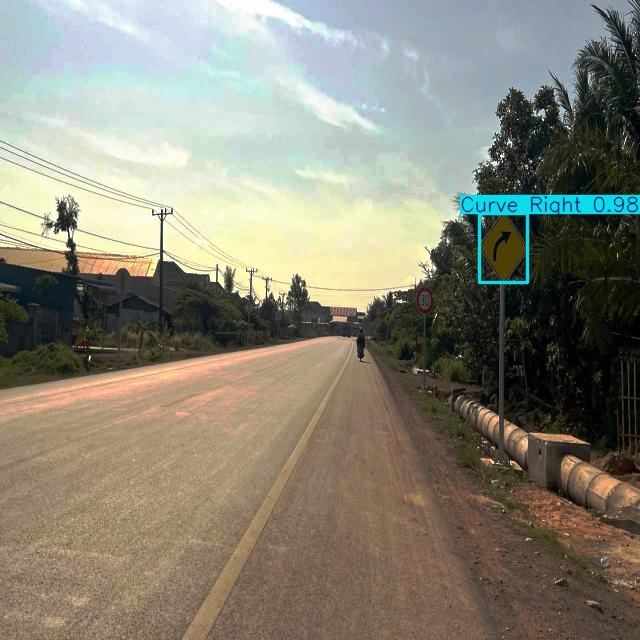

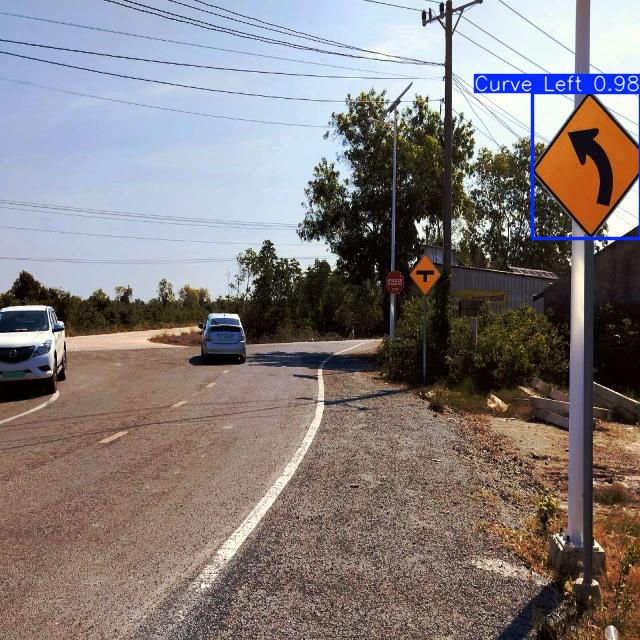

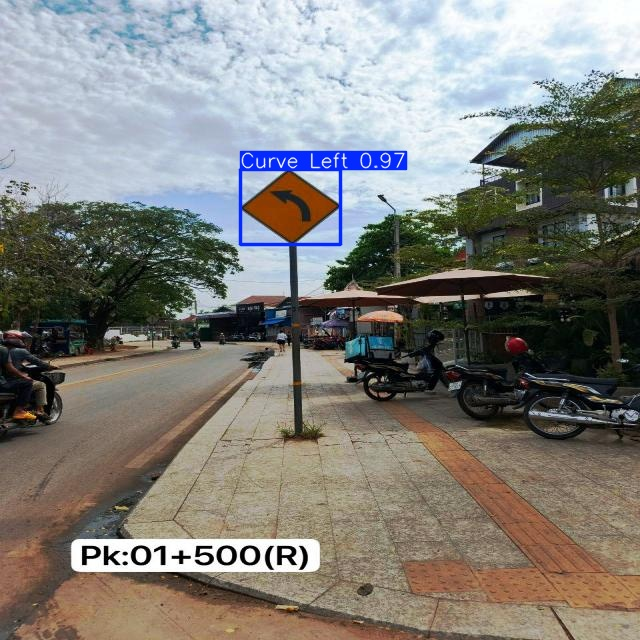

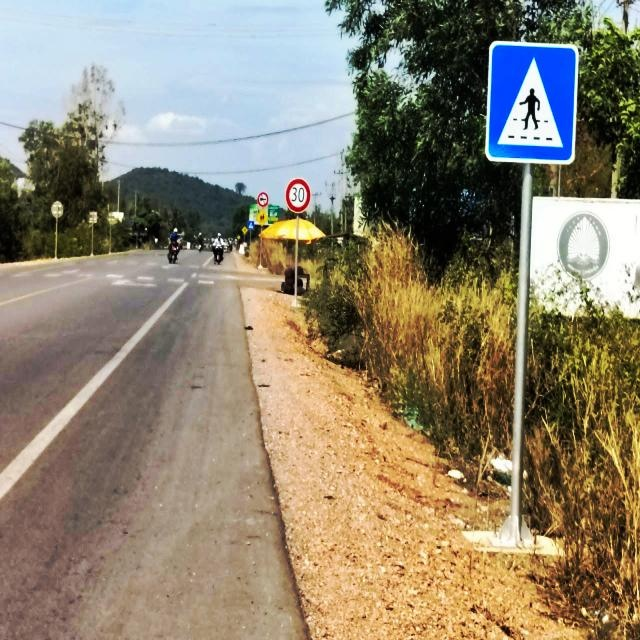

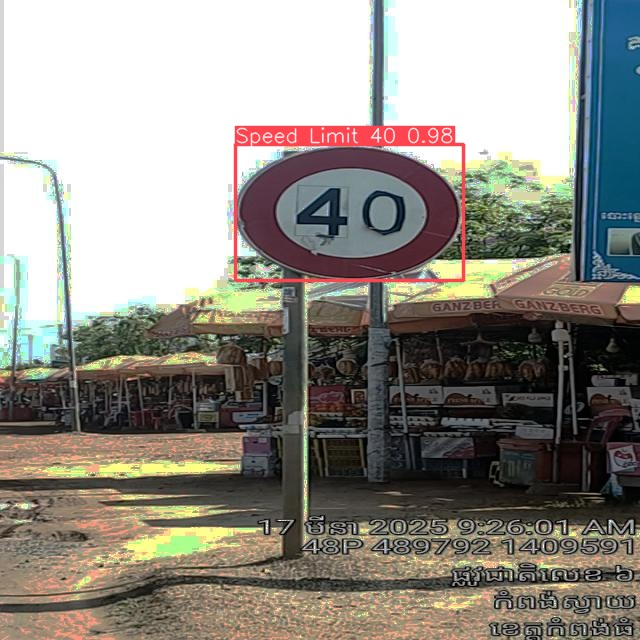

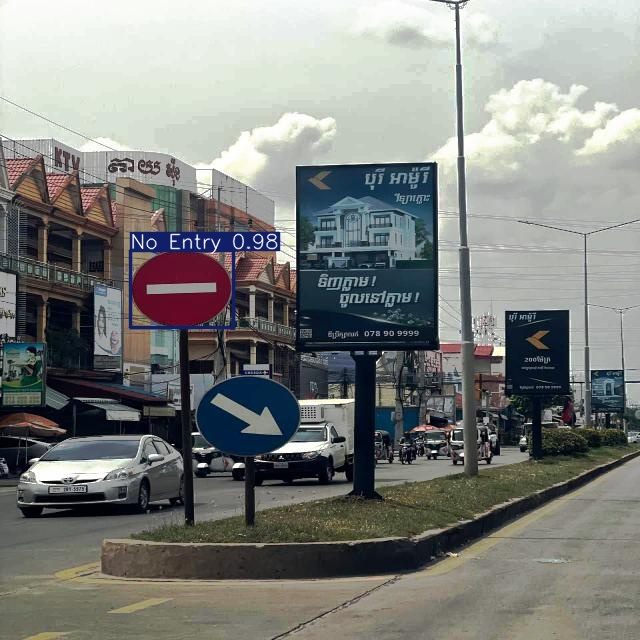

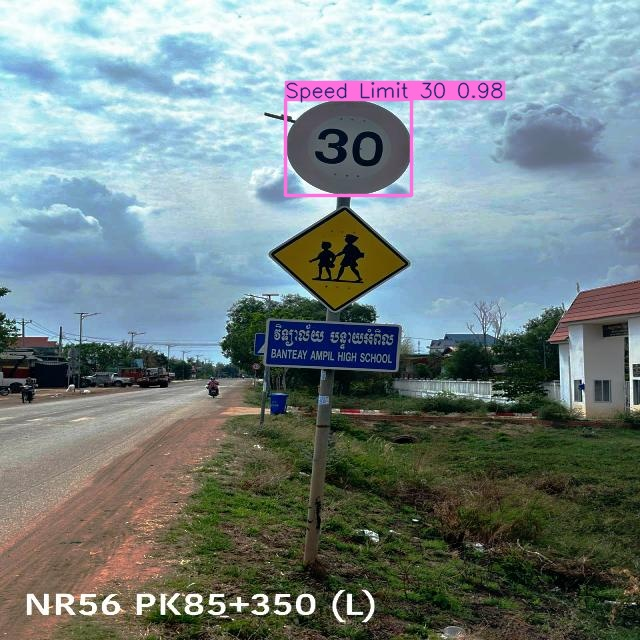

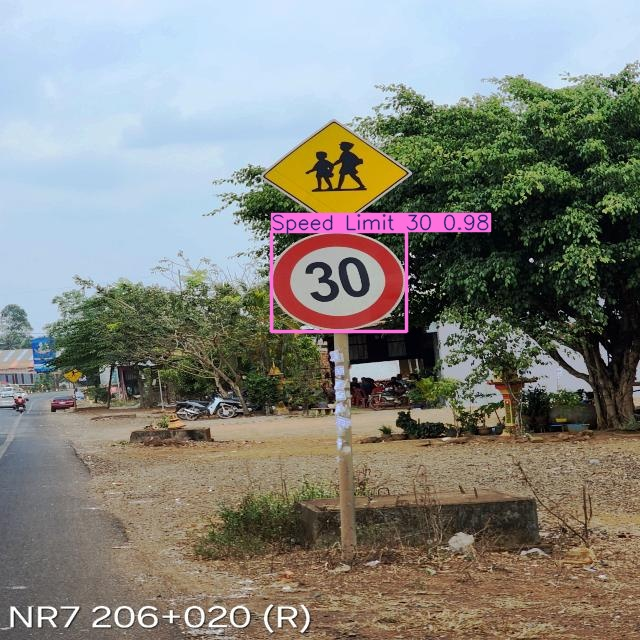

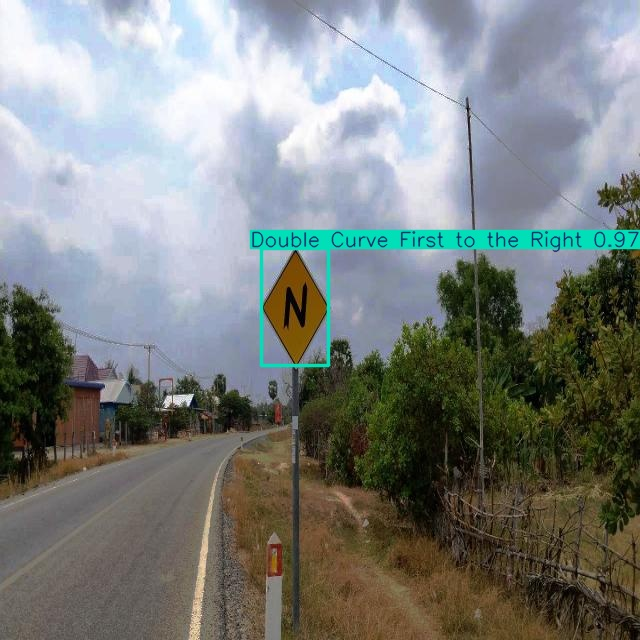

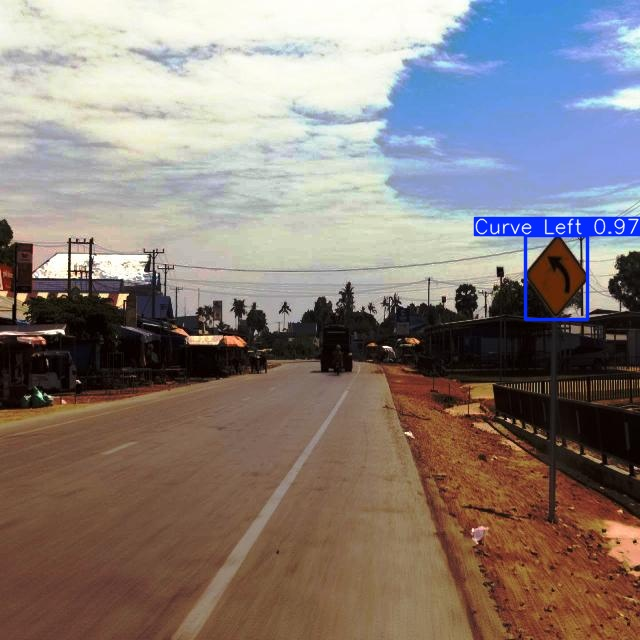

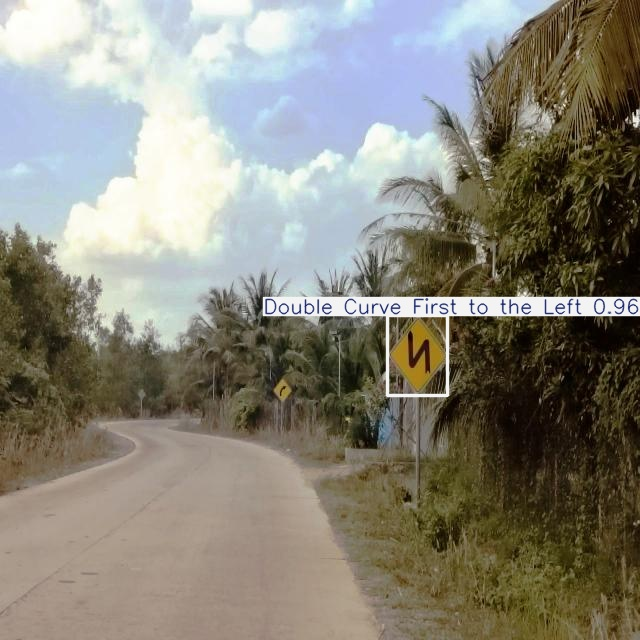

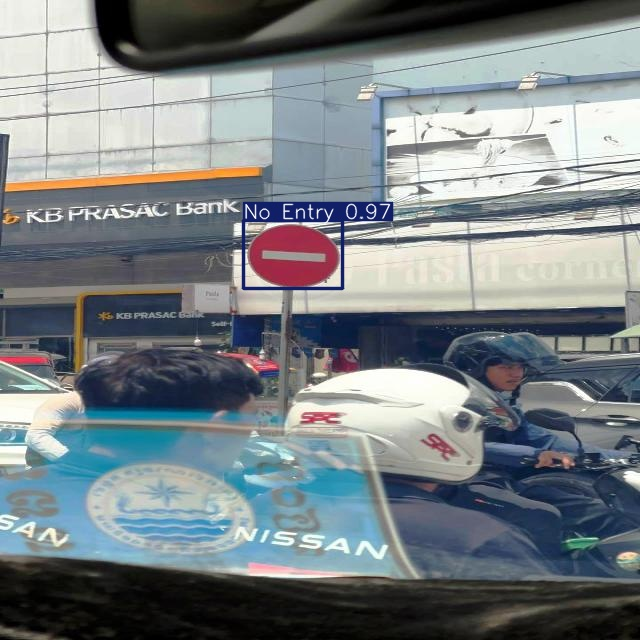

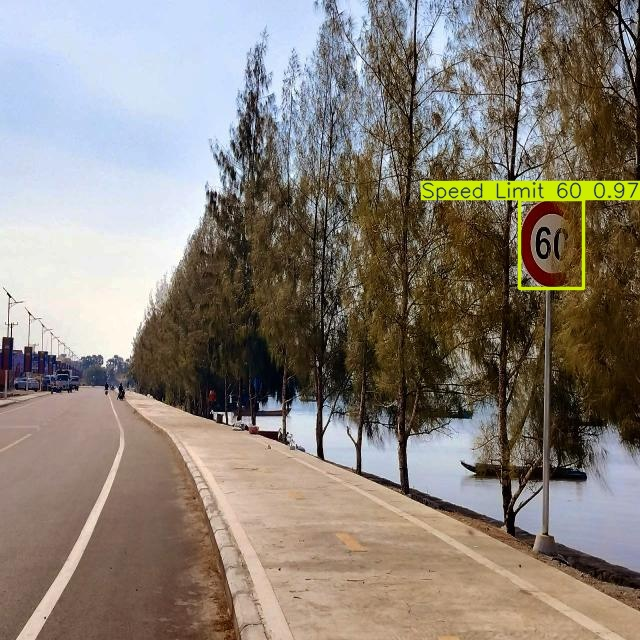

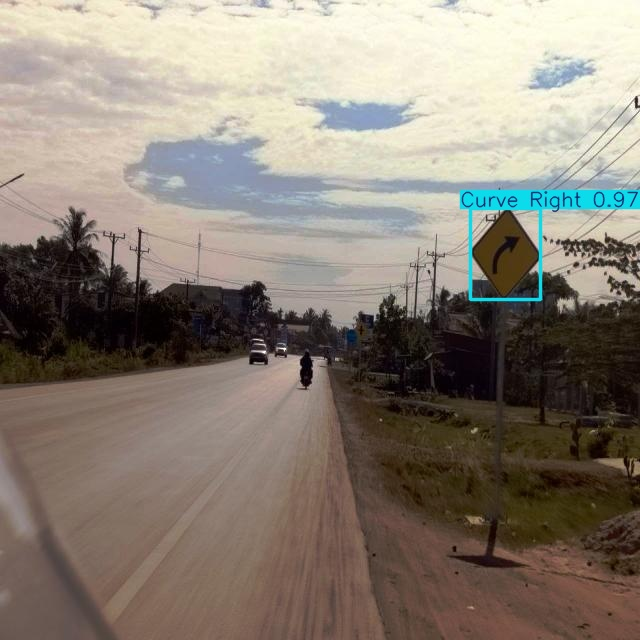

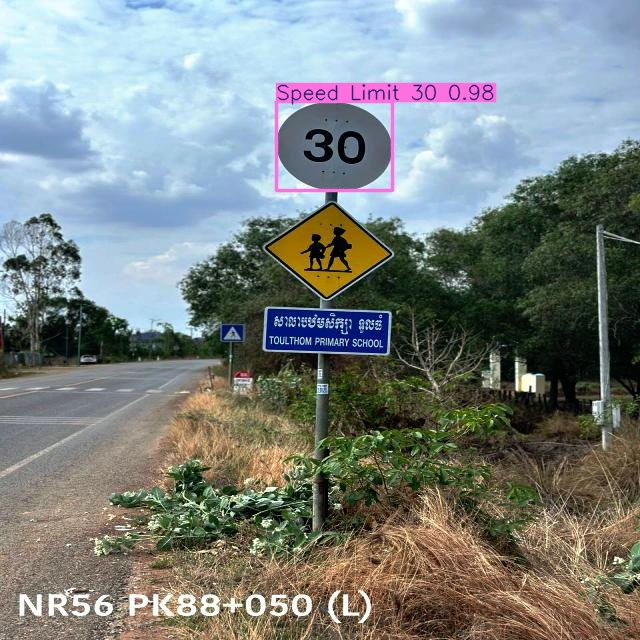

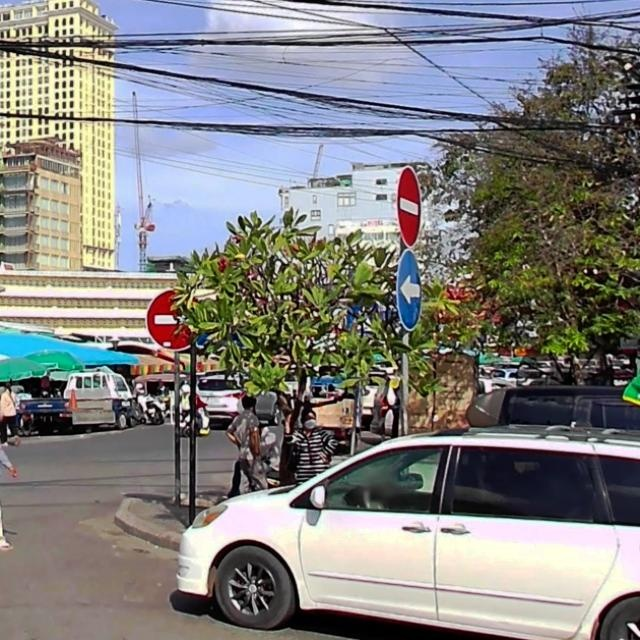

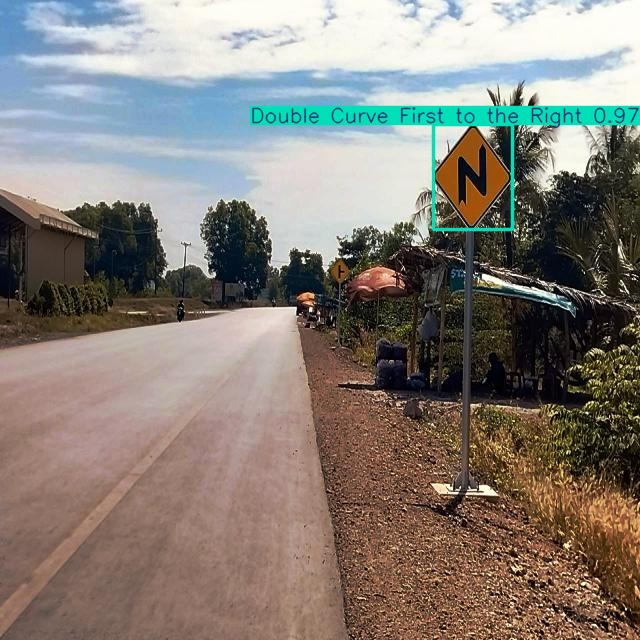

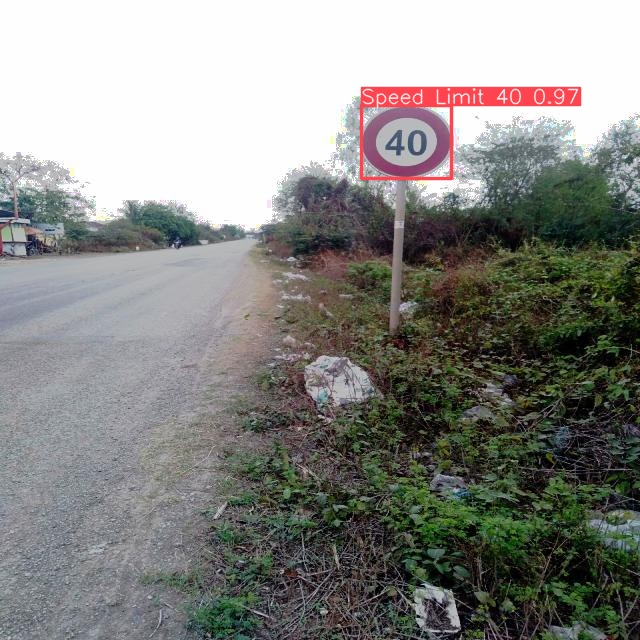

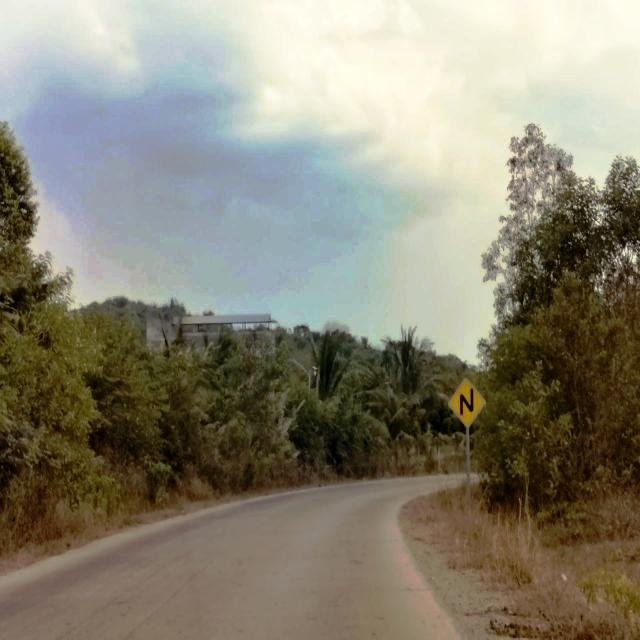

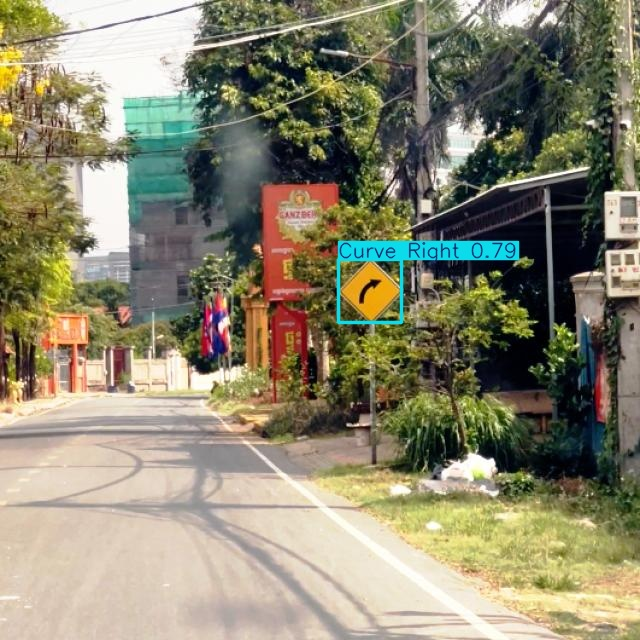

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, width=600))
  print("\n")